# CAB420 Assignment 1A Question 2: Template
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a brief template for CAB420 Assignment 1A, Question 2. It simply implements the data loading, and splitting the data into the predictors and response. You are to use the data splits defined here in your response.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

In [35]:
import pandas
# import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm


In [36]:
# load data
train = pandas.read_csv('training.csv')
val = pandas.read_csv('validation.csv')
test = pandas.read_csv('testing.csv')

# pull out X and y data, convert to numpy
X_train = train.iloc[:,1:].to_numpy()
Y_train = train.iloc[:,0].to_numpy()
X_val = val.iloc[:,1:].to_numpy()
Y_val = val.iloc[:,0].to_numpy()
X_test = test.iloc[:,1:].to_numpy()
Y_test = test.iloc[:,0].to_numpy()

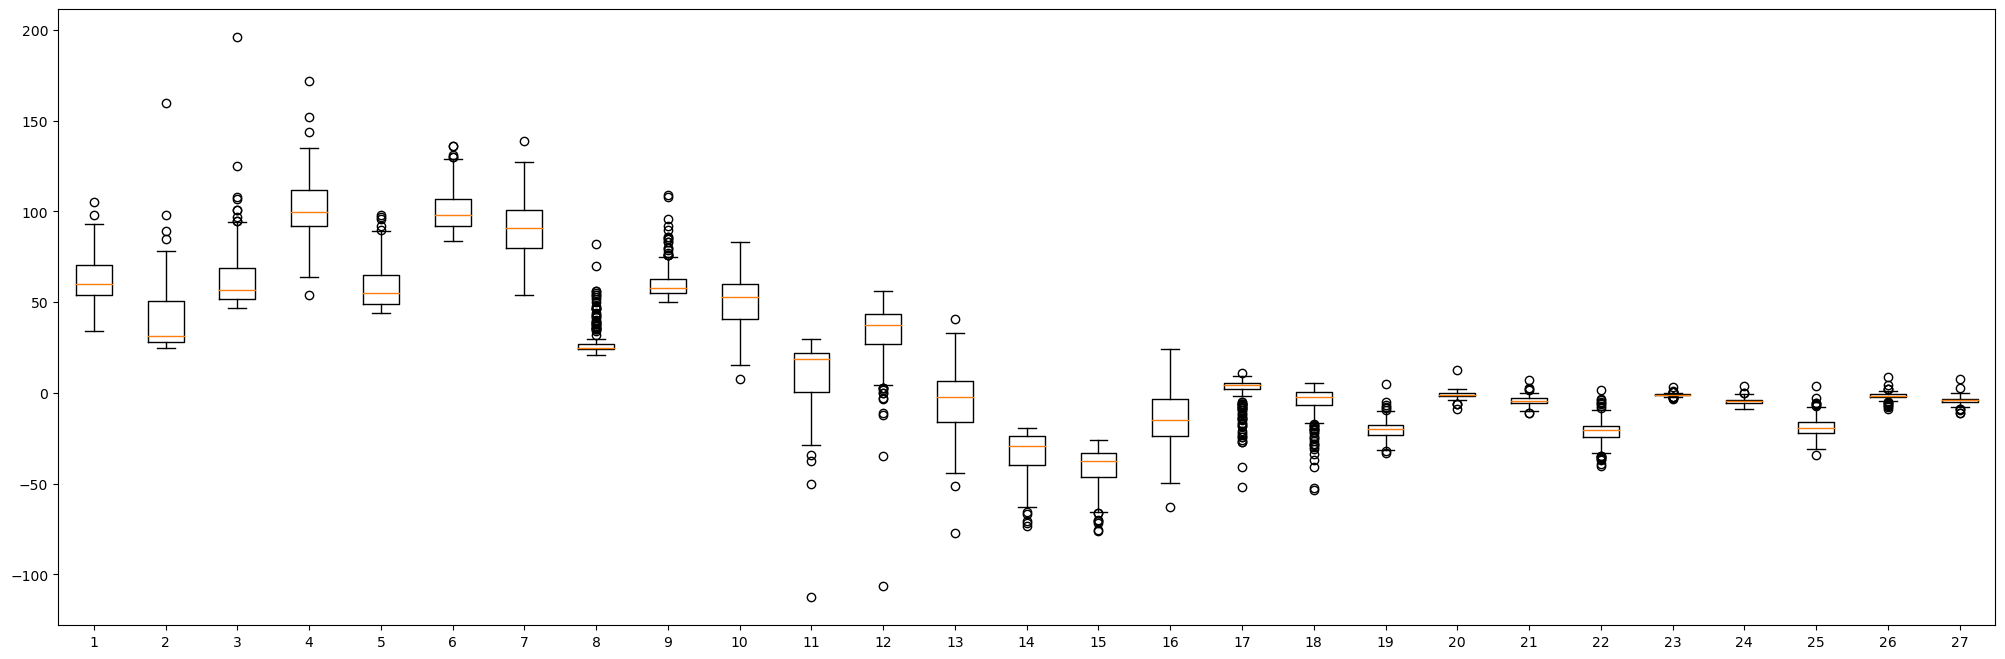

In [37]:
# Do a box plot for the training data
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train);

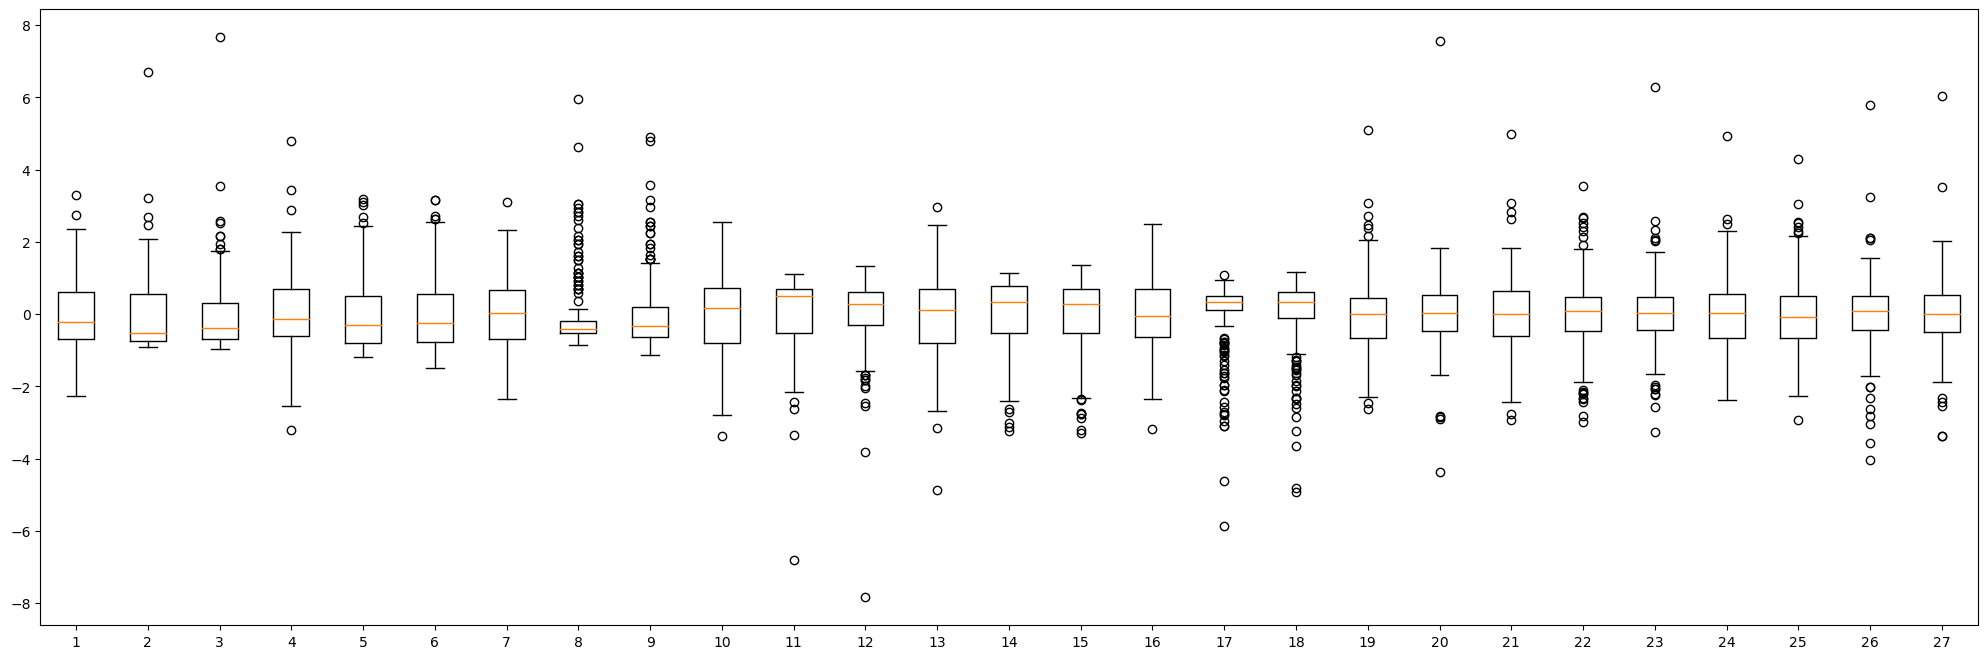

In [38]:
# We have to standardize the data using mu and sigma
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_train = (X_train - mu) / sigma
X_val = (X_val - mu) / sigma
X_test = (X_test - mu) / sigma

# Do a box plot for the training data
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train);


In [39]:
# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - get precision, recall, f1 for test data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance: %1.3f' % (sum(model.predict(X_train) == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Testing Set Performance: %1.3f' % (sum(model.predict(X_test) == Y_test)/len(Y_test)));
    print(classification_report(Y_test, model.predict(X_test)))

# CKNN

              precision    recall  f1-score   support

          d        0.77      0.77      0.77        53
          h        0.54      0.87      0.67        15
          o        0.95      0.65      0.77        31
          s        0.79      0.81      0.80        62

    accuracy                           0.77       161
   macro avg       0.77      0.77      0.75       161
weighted avg       0.79      0.77      0.77       161



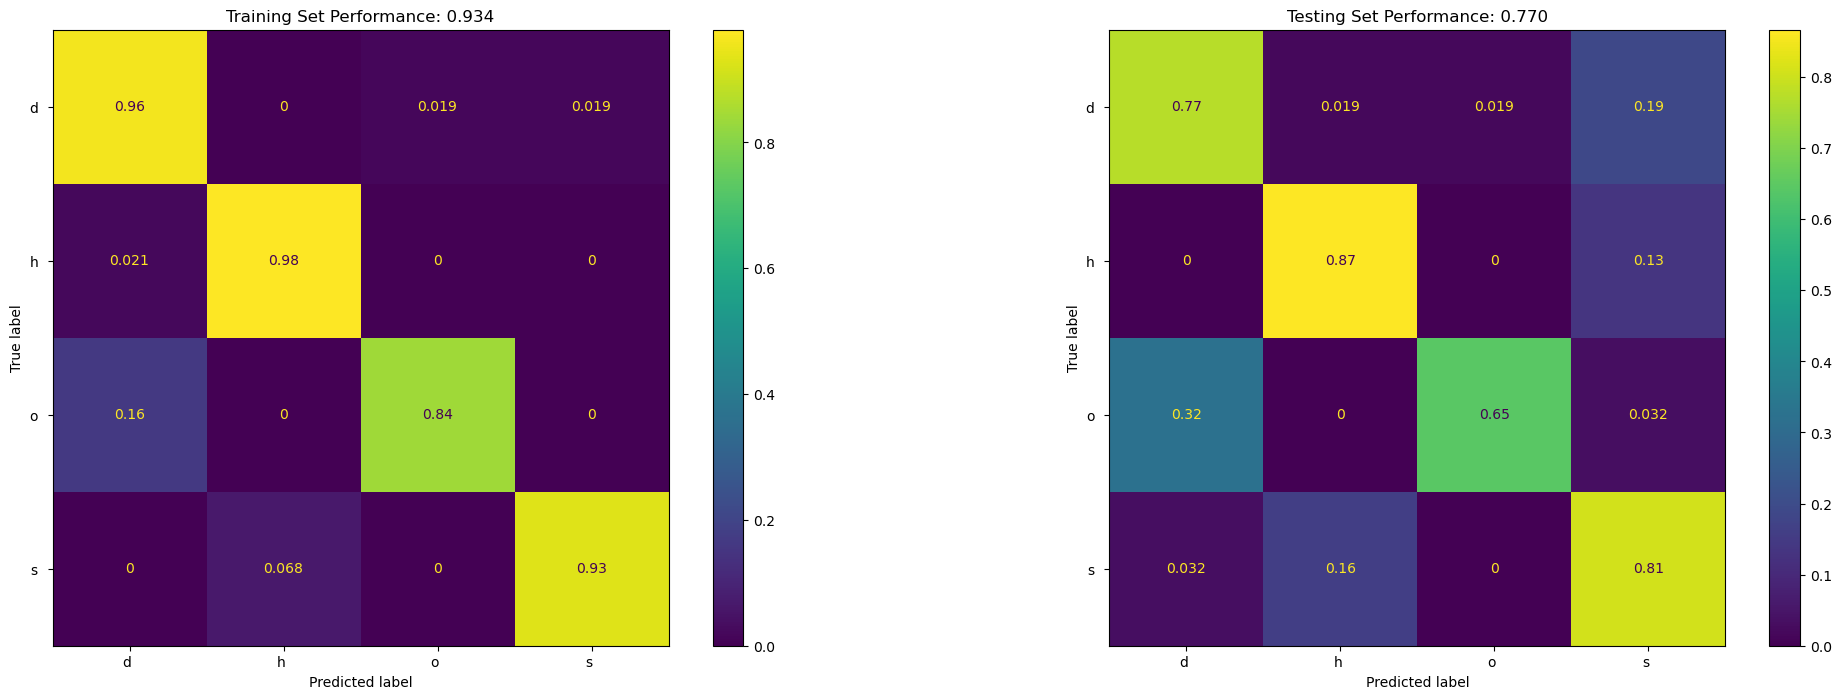

In [40]:
cknn = KNeighborsClassifier(n_neighbors=20)
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.82      0.92      0.87        53
          h        0.62      0.87      0.72        15
          o        0.96      0.71      0.81        31
          s        0.88      0.81      0.84        62

    accuracy                           0.83       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.83      0.83       161

              precision    recall  f1-score   support

          d        0.75      0.92      0.83        53
          h        0.64      0.93      0.76        15
          o        0.95      0.68      0.79        31
          s        0.92      0.77      0.84        62

    accuracy                           0.82       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.82      0.82       161

              precision    recall  f1-score   support

          d        0.79      0.87      0.83        53
          h        0.

/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


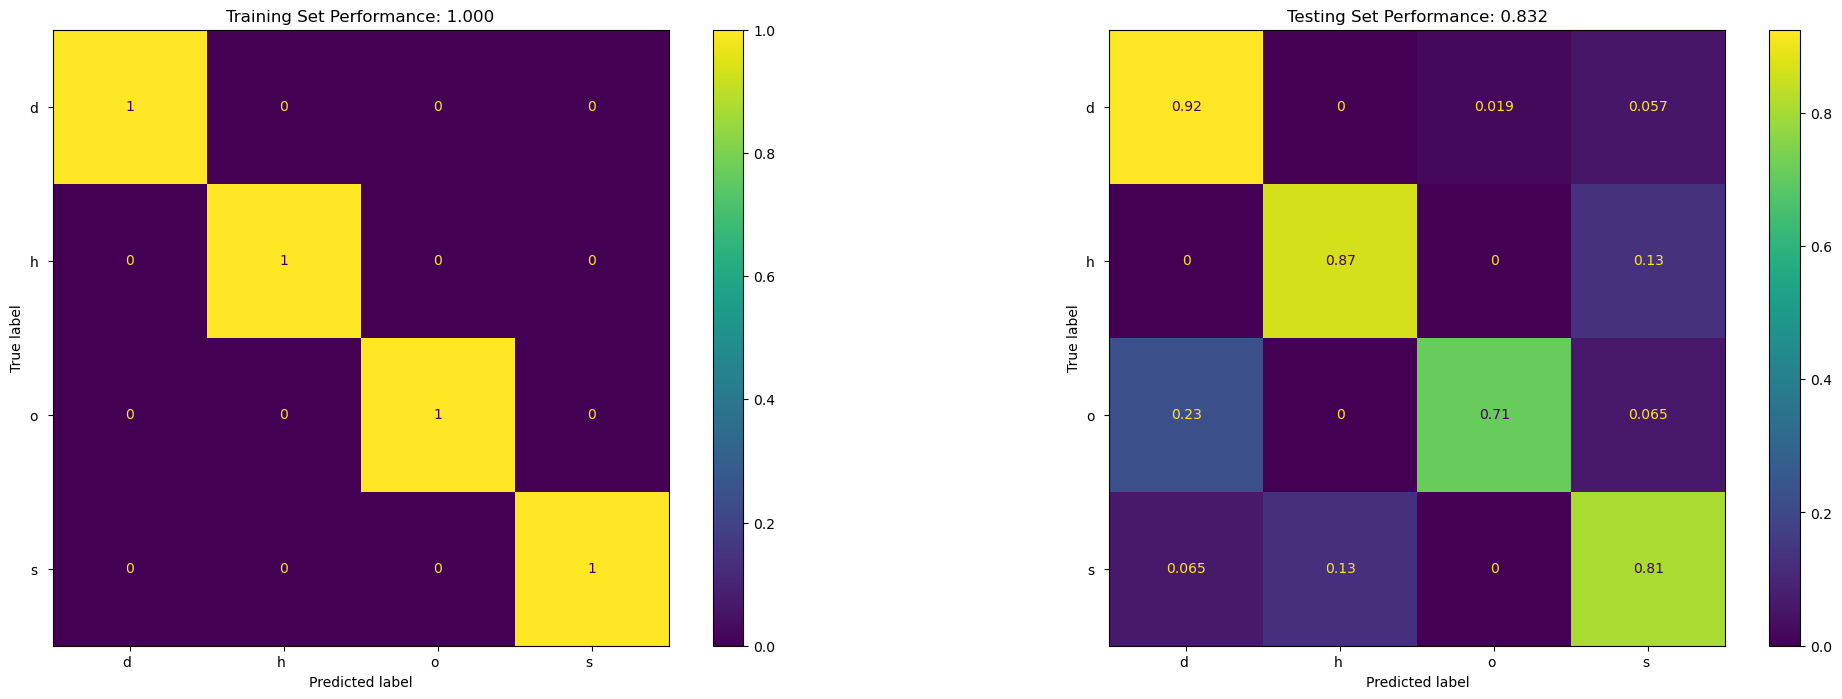

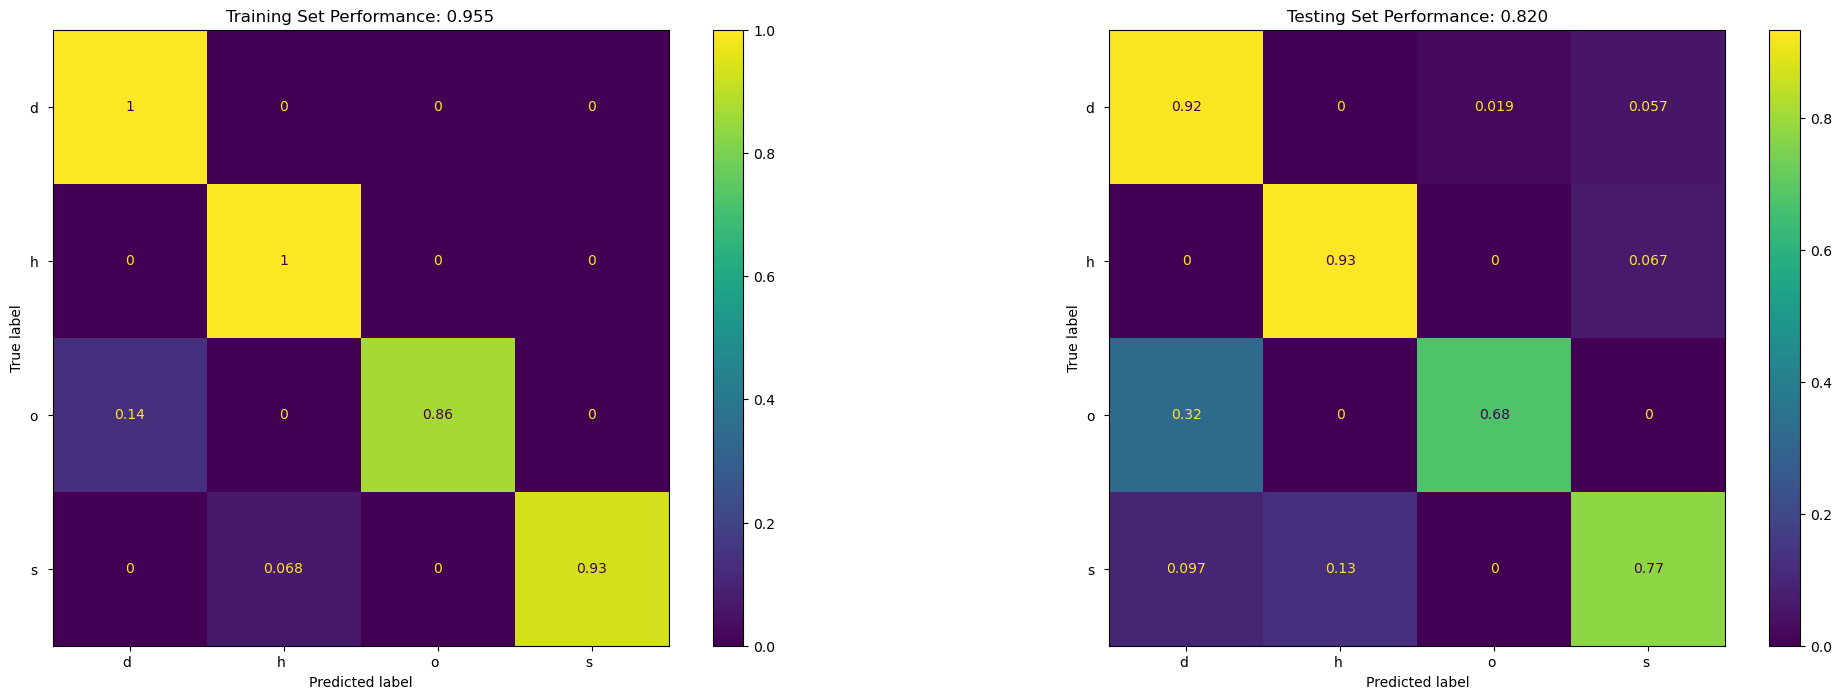

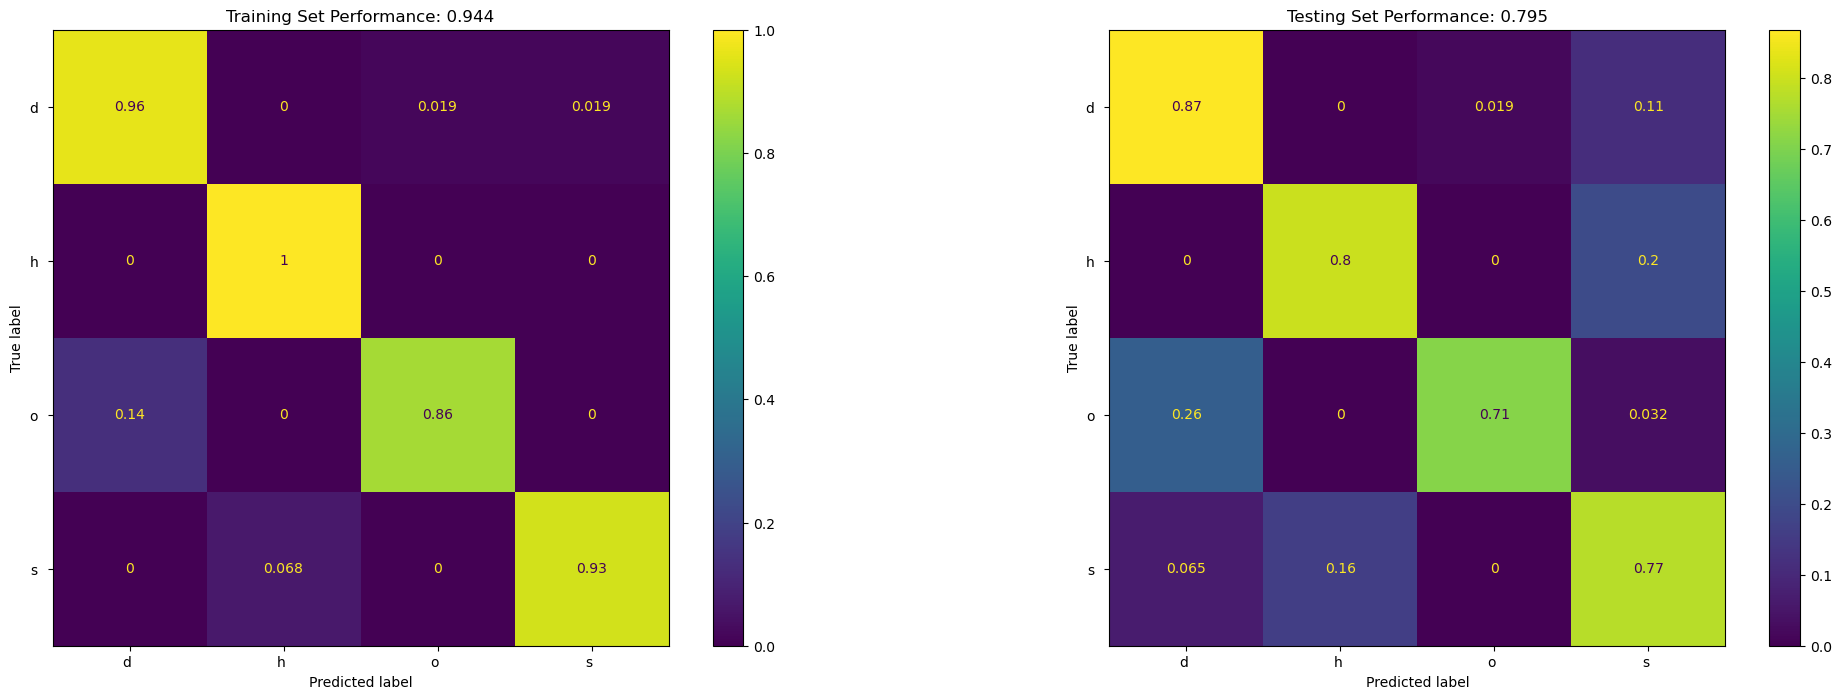

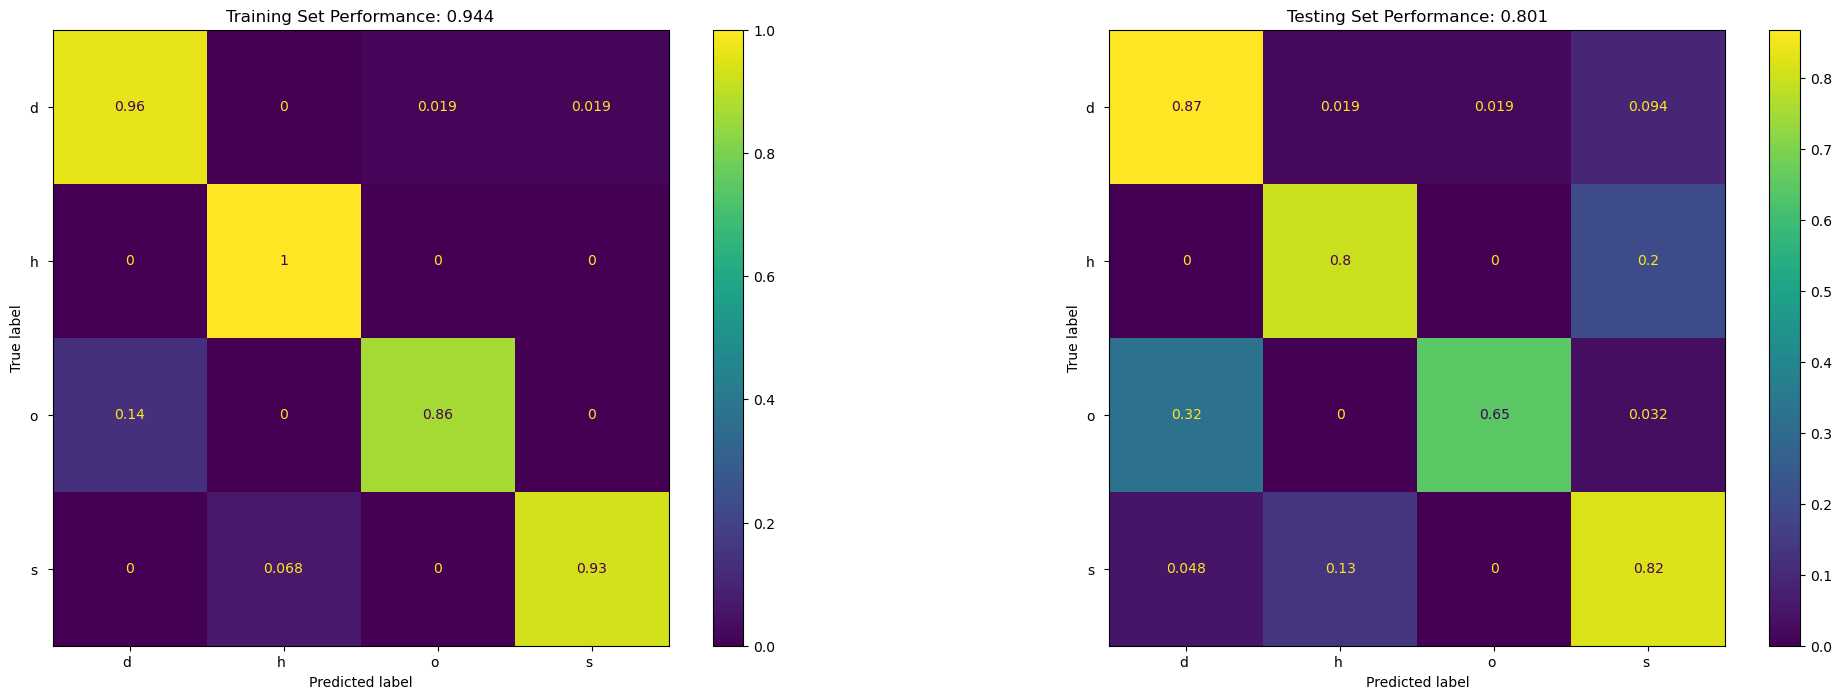

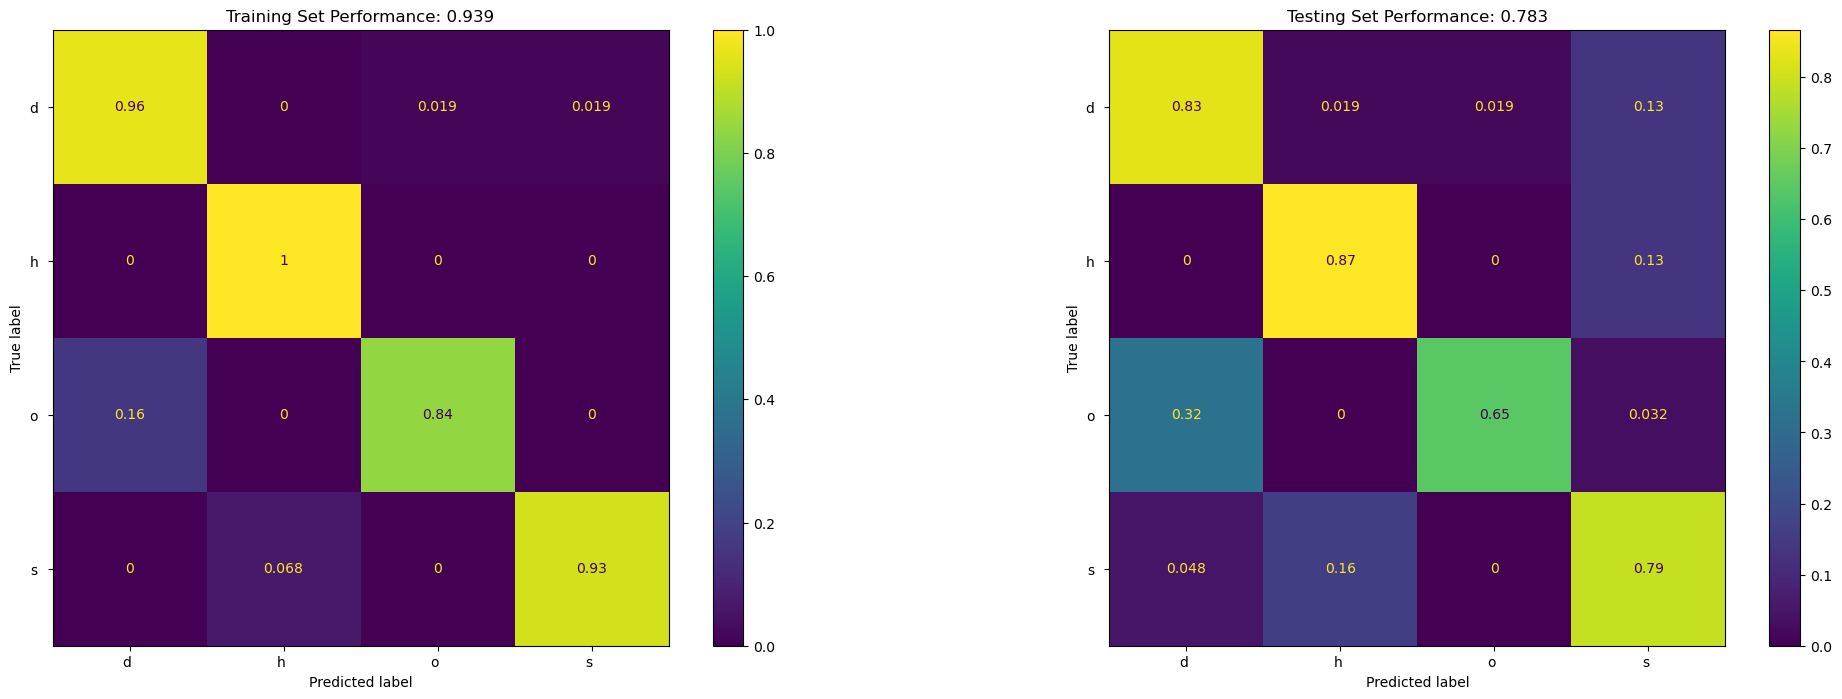

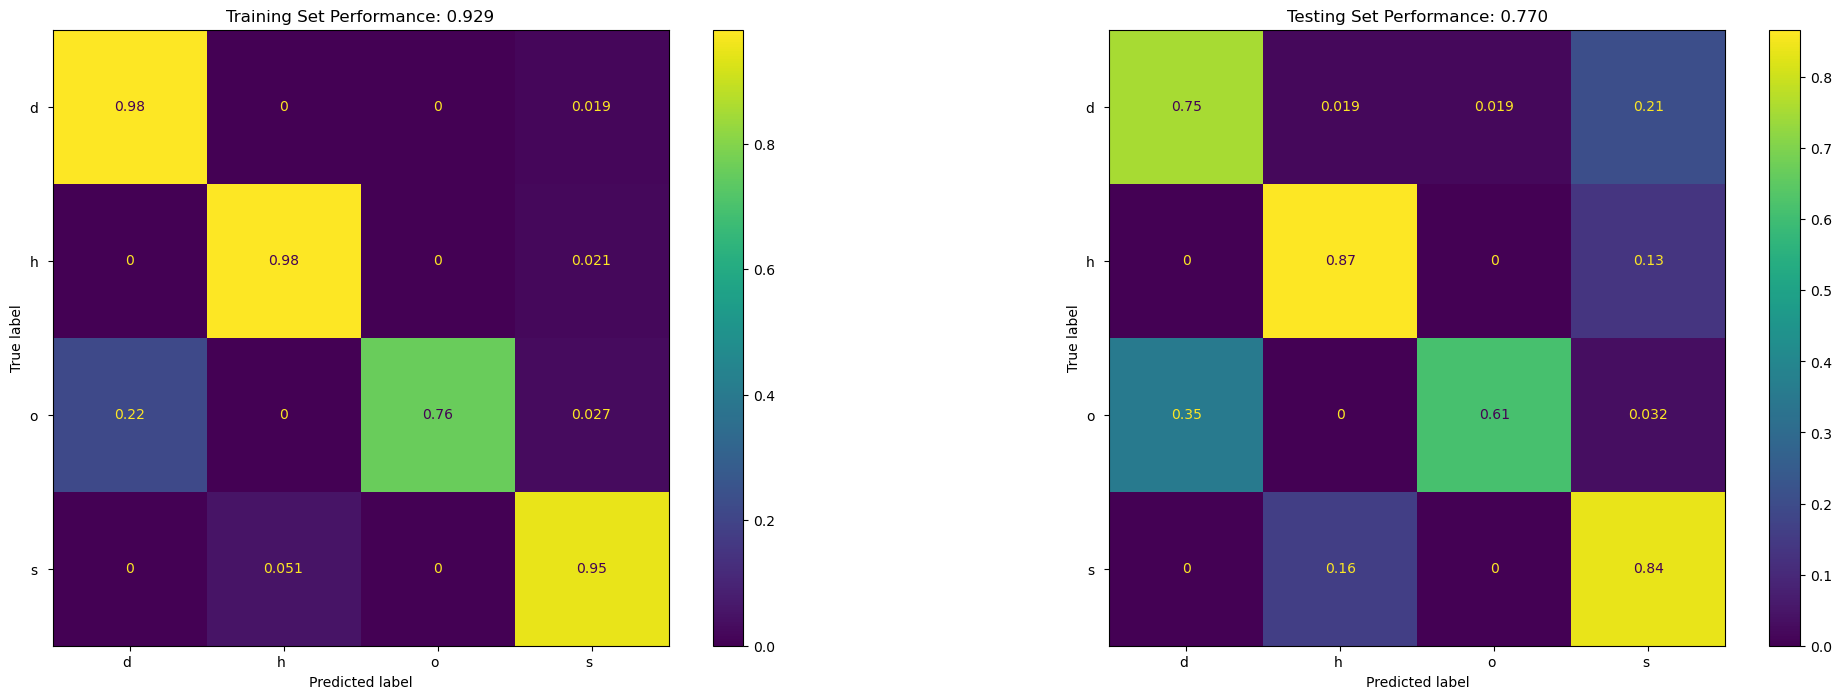

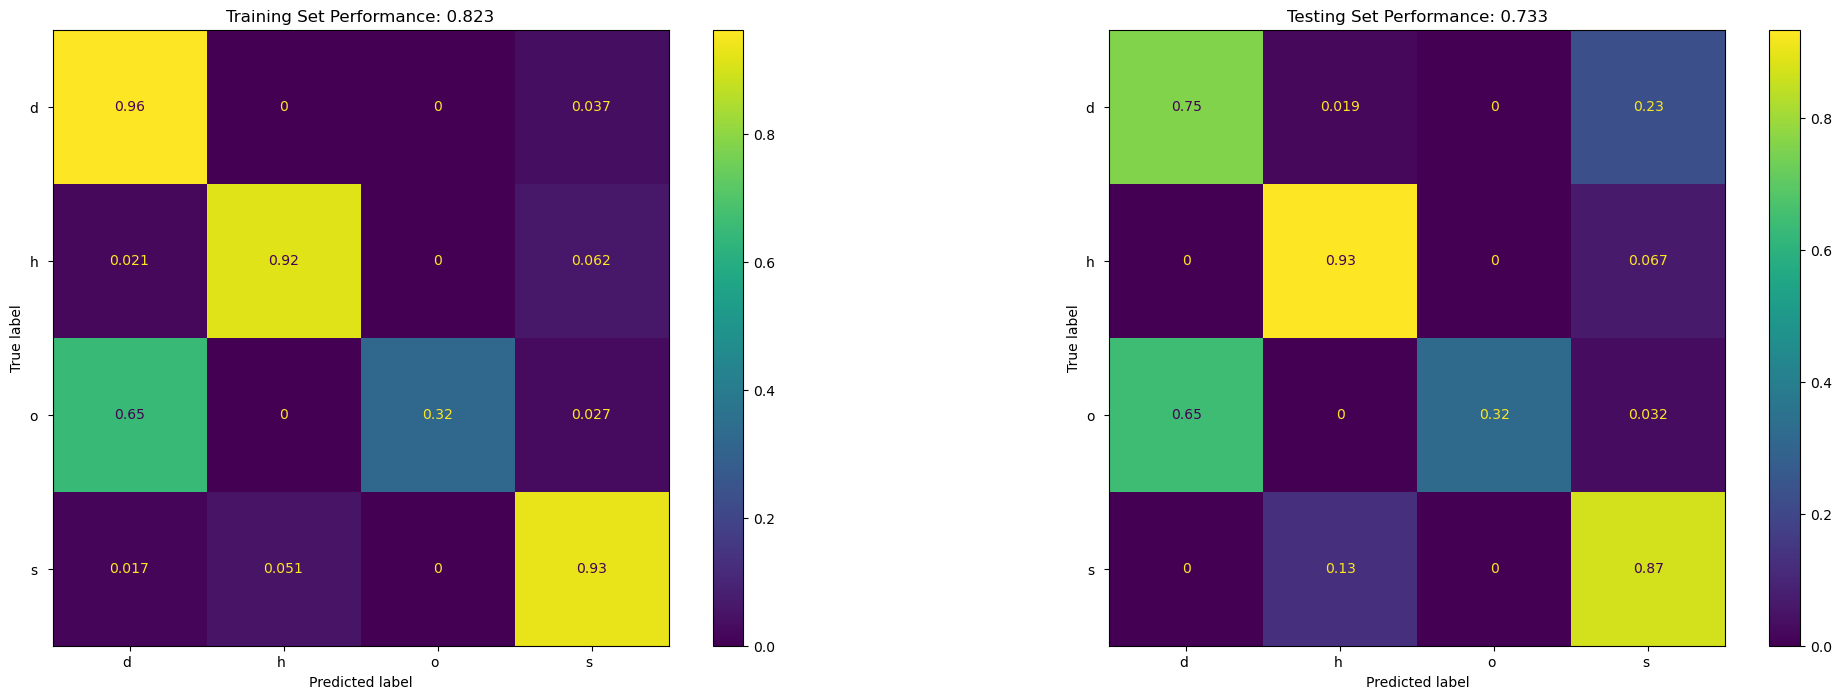

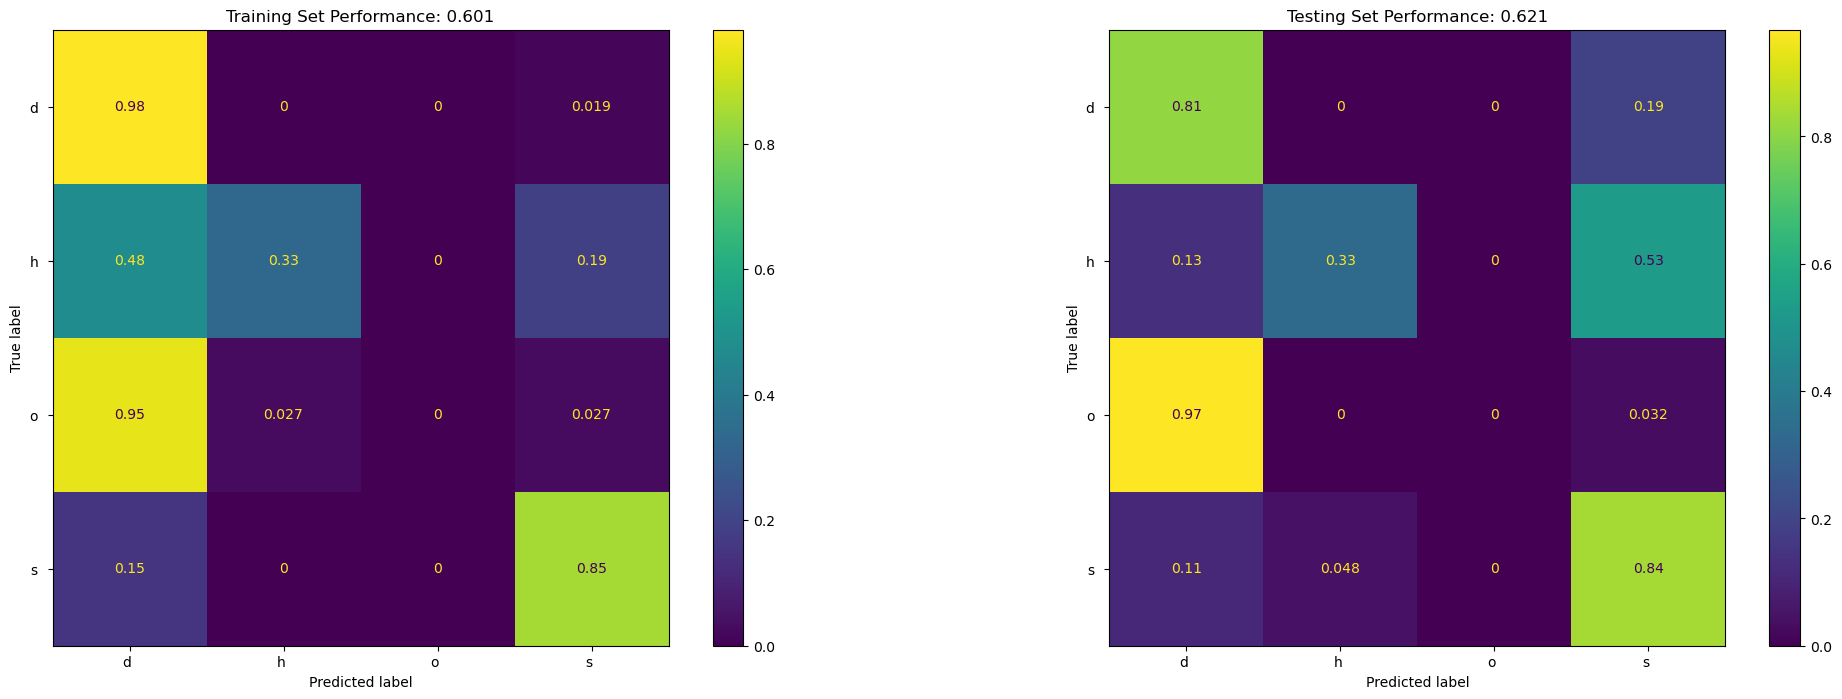

In [41]:
values_of_k = [1, 2, 4, 8, 16, 32, 64, 128]
for k in values_of_k:
    cknn = KNeighborsClassifier(n_neighbors=k)
    cknn.fit(X_train, Y_train)
    eval_model(cknn, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.82      0.92      0.87        53
          h        0.62      0.87      0.72        15
          o        0.96      0.71      0.81        31
          s        0.88      0.81      0.84        62

    accuracy                           0.83       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.83      0.83       161

              precision    recall  f1-score   support

          d        0.82      0.92      0.87        53
          h        0.62      0.87      0.72        15
          o        0.96      0.71      0.81        31
          s        0.88      0.81      0.84        62

    accuracy                           0.83       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.83      0.83       161

              precision    recall  f1-score   support

          d        0.83      0.85      0.84        53
          h        0.

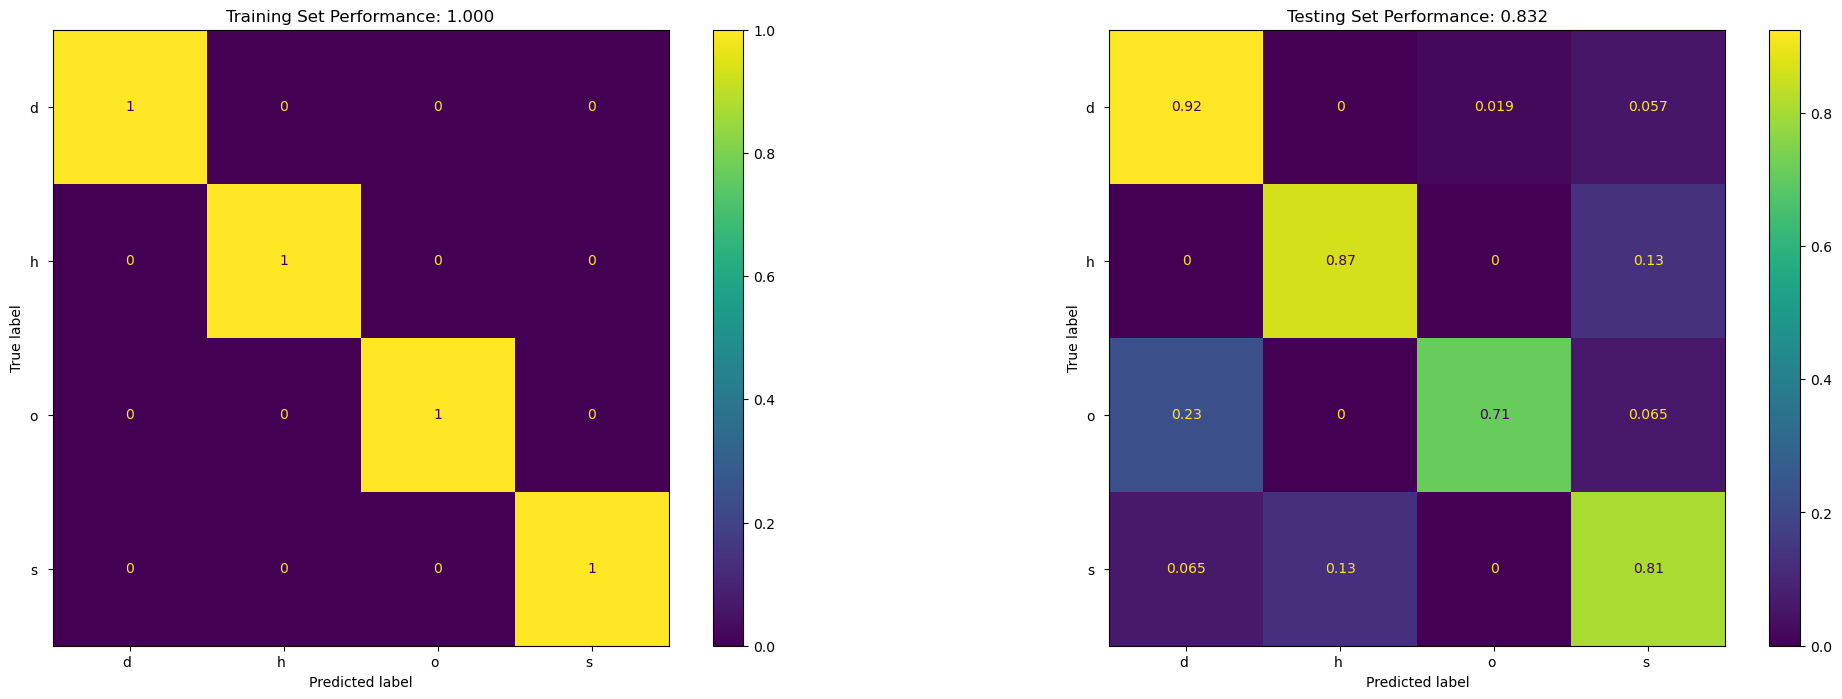

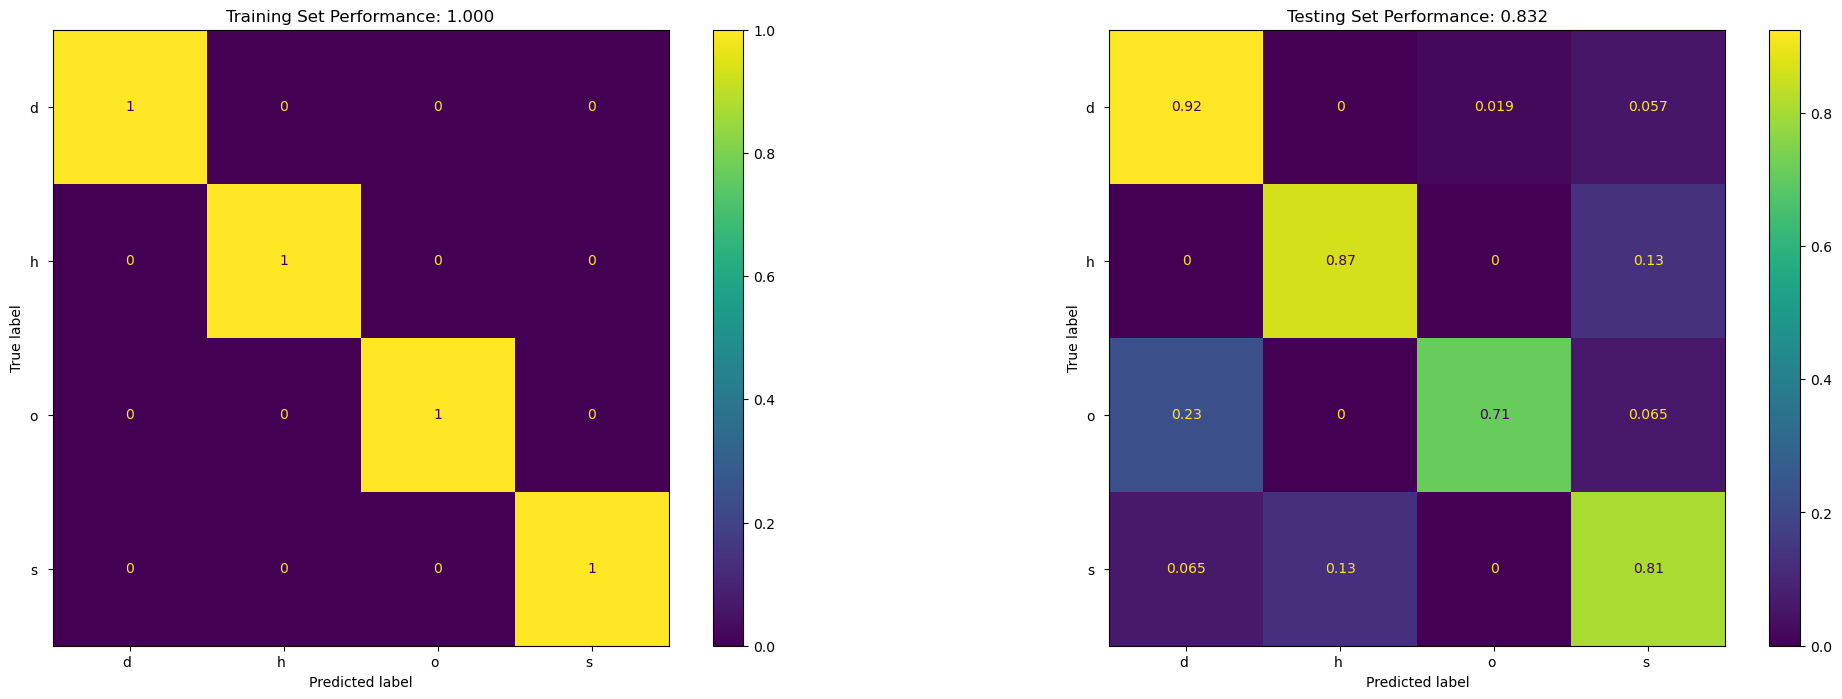

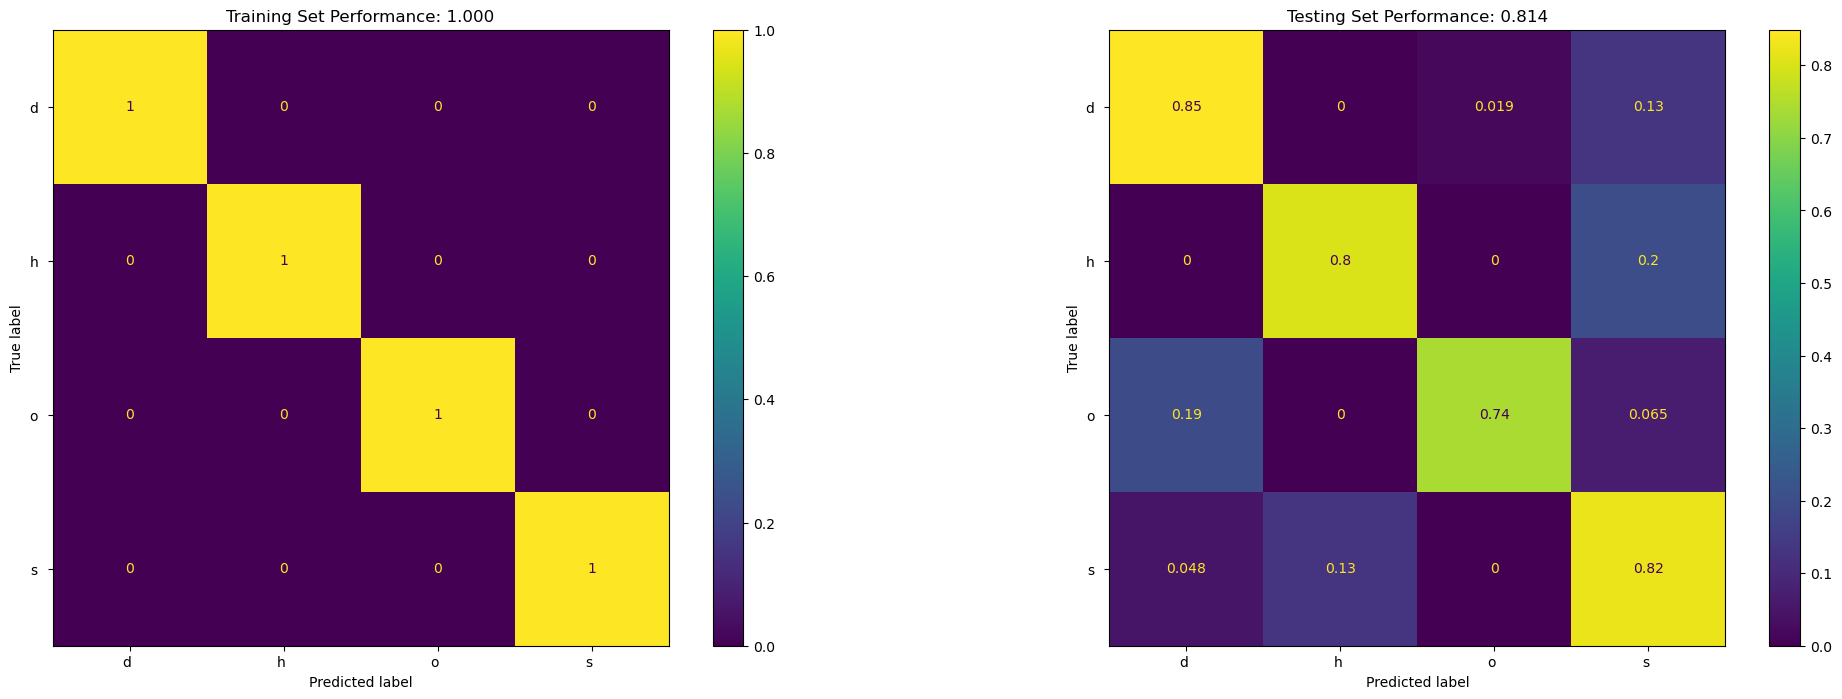

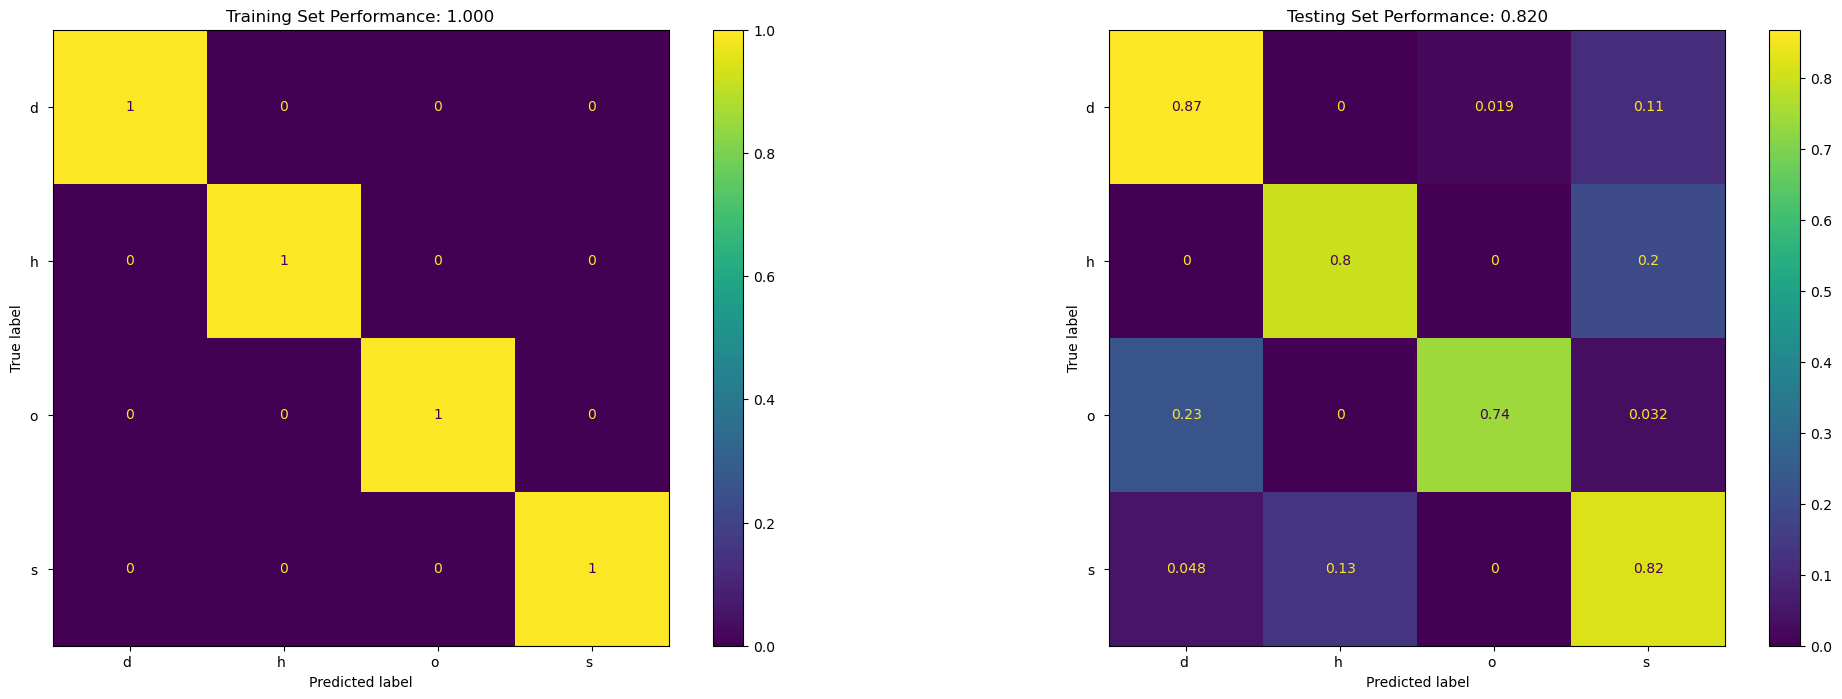

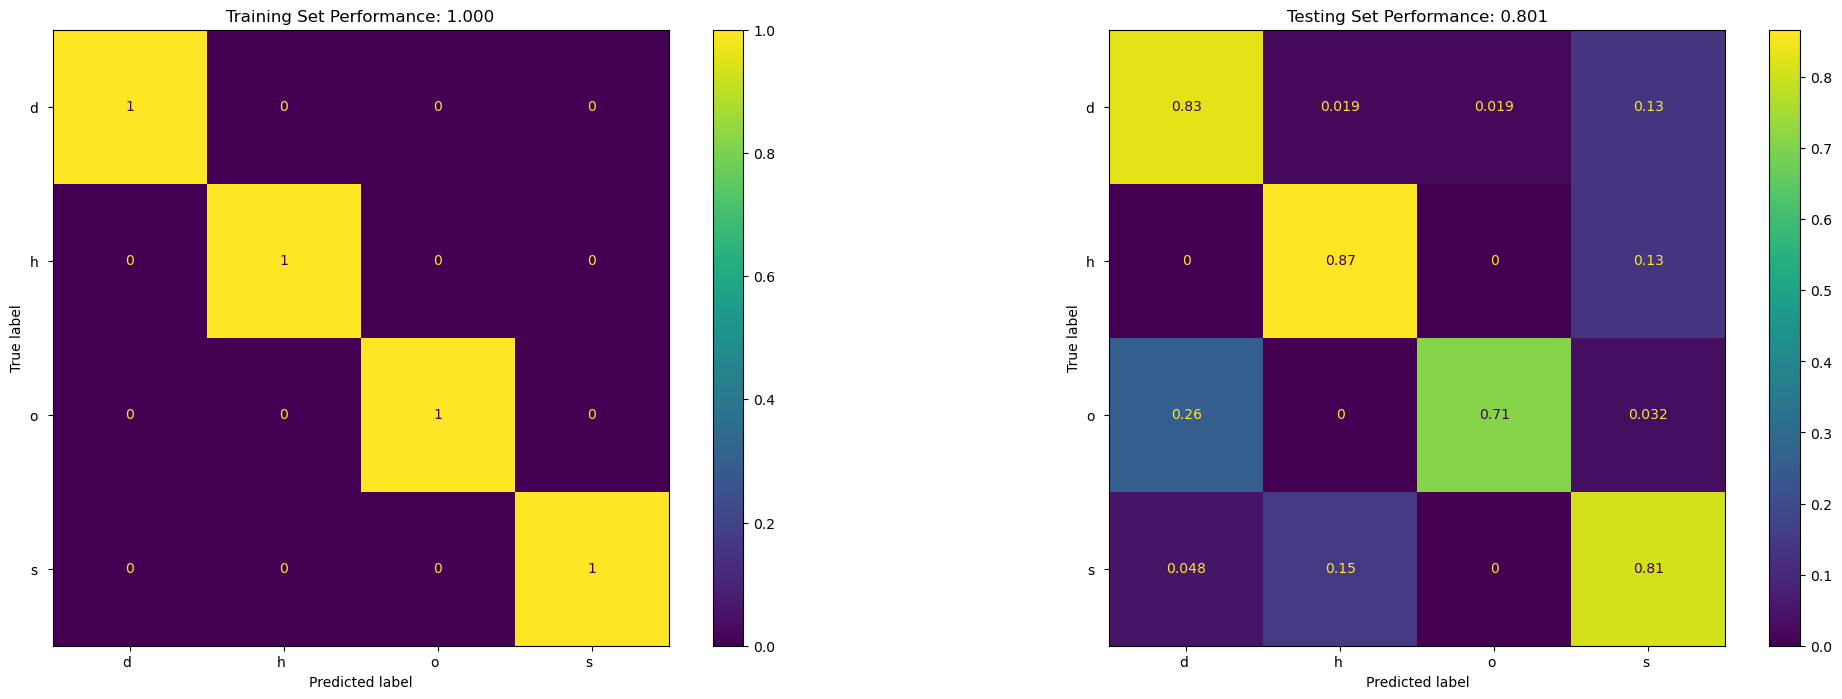

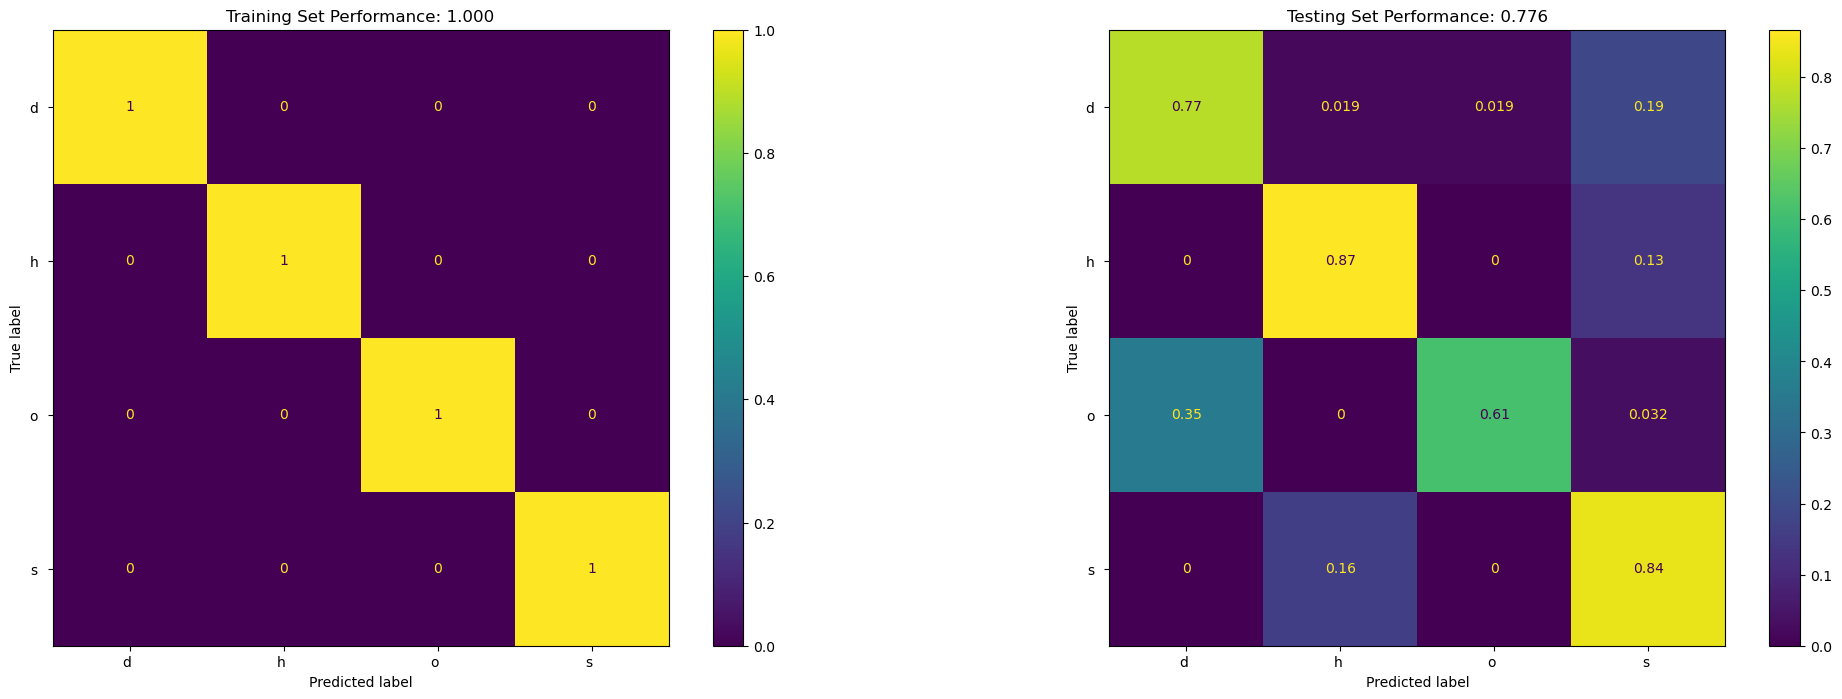

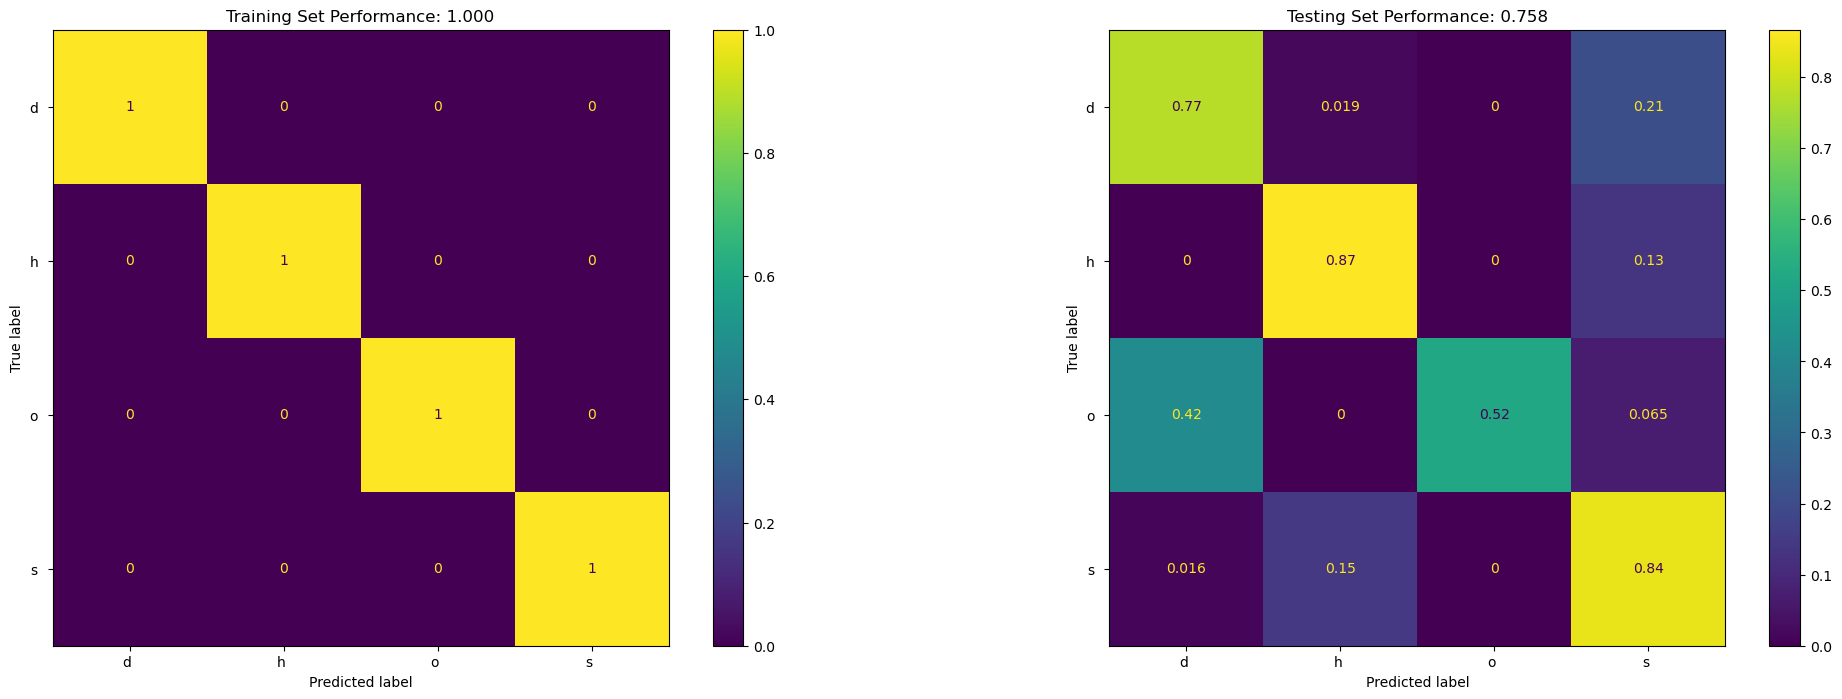

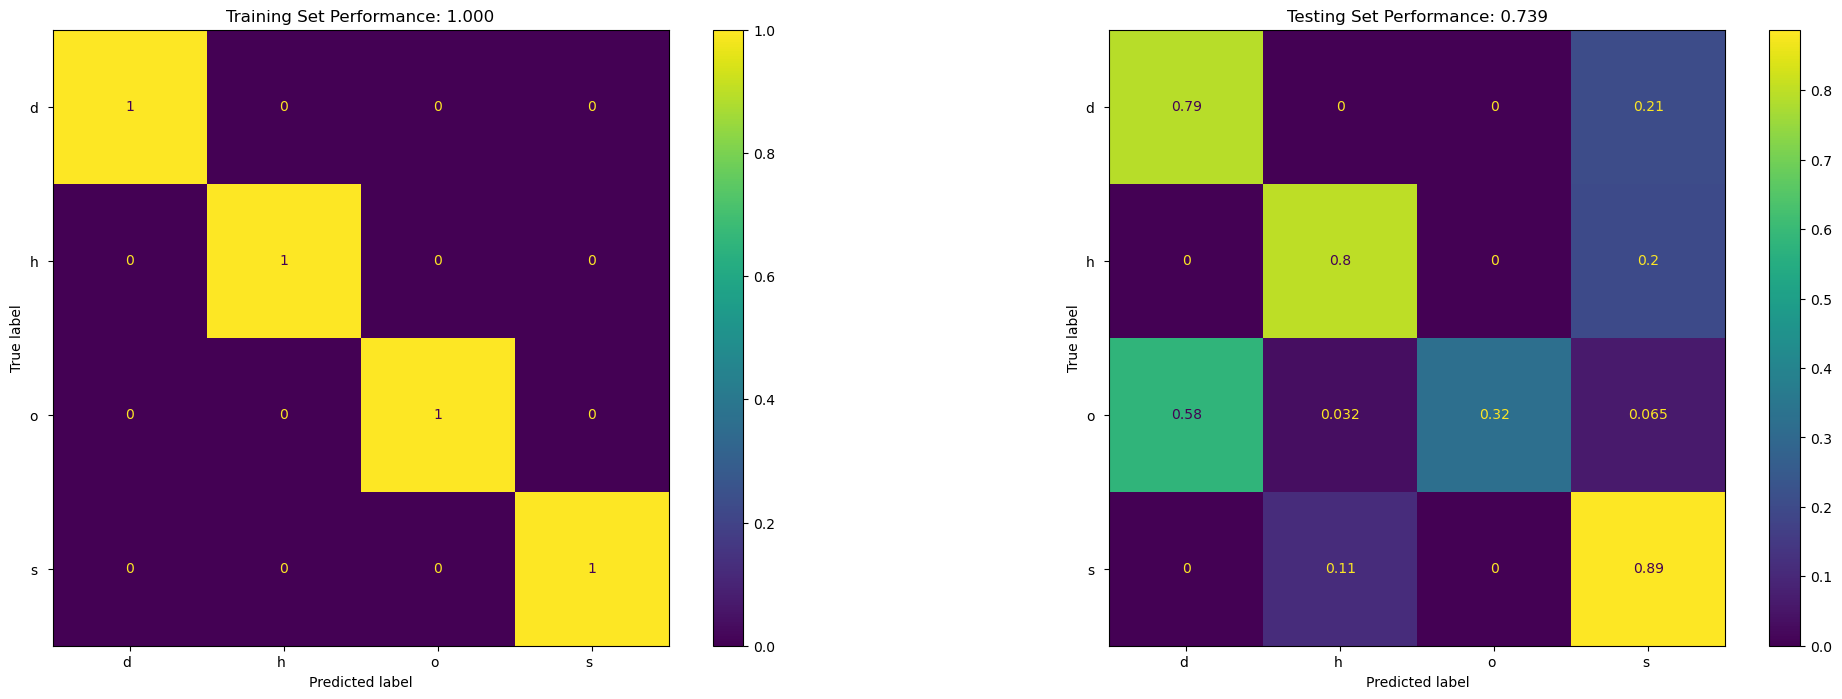

In [42]:
for k in values_of_k:
    cknn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    cknn.fit(X_train, Y_train)
    eval_model(cknn, X_train, Y_train, X_test, Y_test)

# Random Forest Classifier

              precision    recall  f1-score   support

          d        0.80      0.70      0.75        53
          h        0.68      0.87      0.76        15
          o        0.81      0.81      0.81        31
          s        0.82      0.85      0.83        62

    accuracy                           0.80       161
   macro avg       0.78      0.81      0.79       161
weighted avg       0.80      0.80      0.79       161



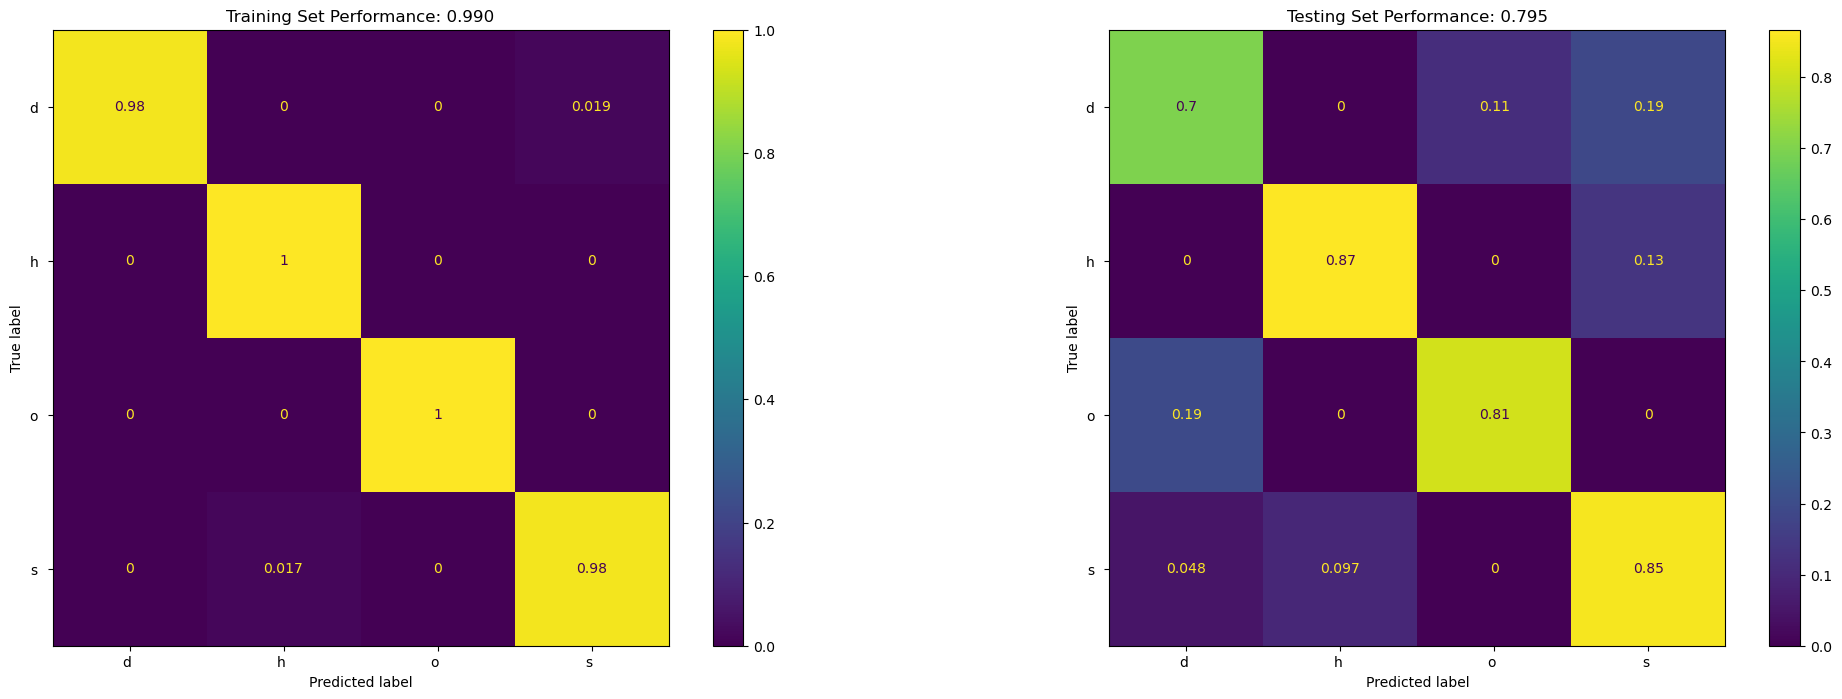

In [43]:
# random forest simple model.
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)


              precision    recall  f1-score   support

          d        0.80      0.70      0.75        53
          h        0.68      0.87      0.76        15
          o        0.80      0.77      0.79        31
          s        0.80      0.85      0.83        62

    accuracy                           0.79       161
   macro avg       0.77      0.80      0.78       161
weighted avg       0.79      0.79      0.79       161



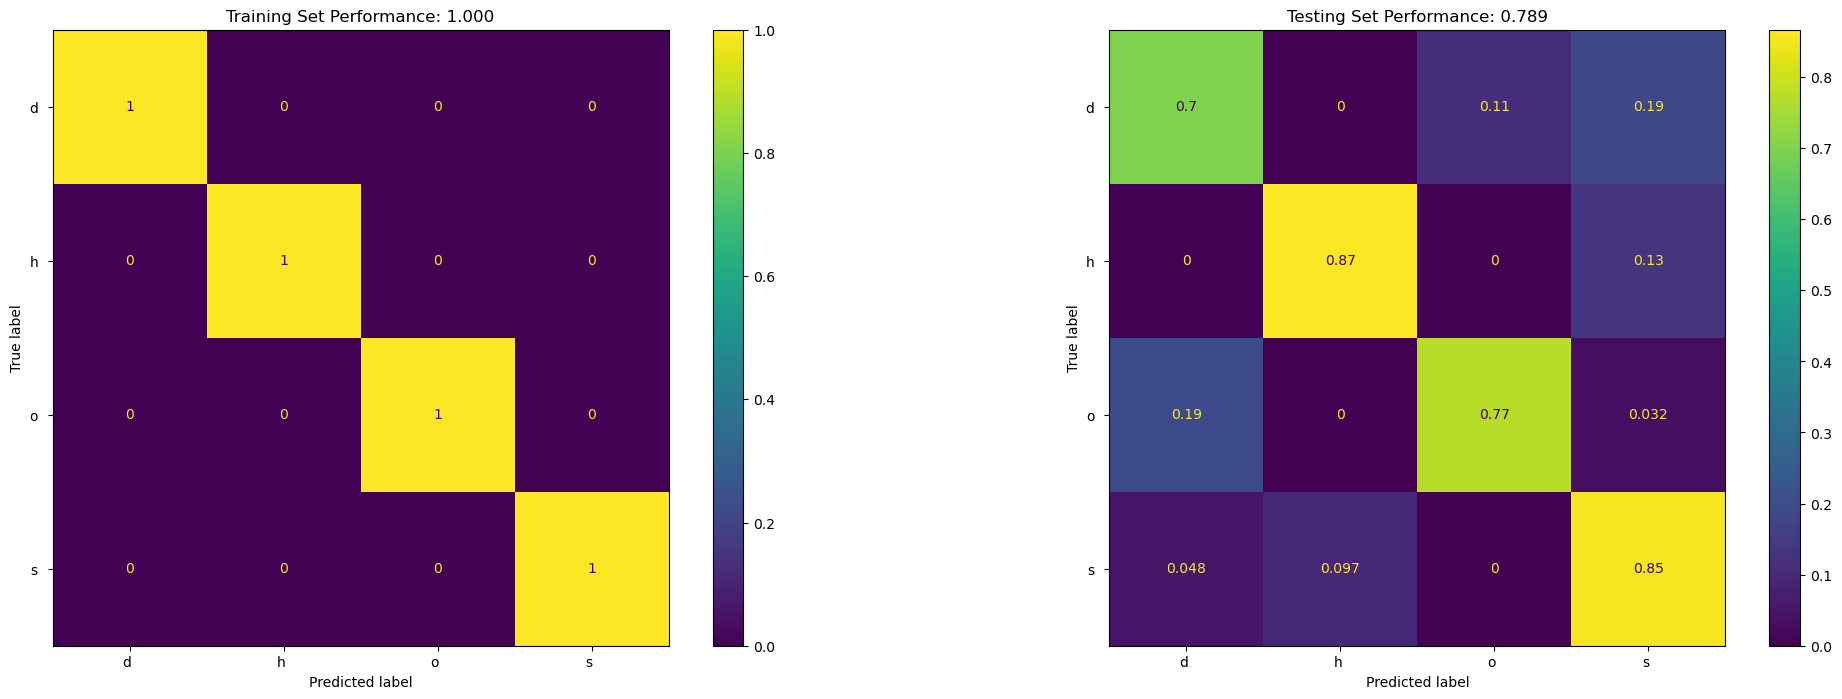

In [44]:
# Balance problems. This can be fixed by  

# 1) Make the trees deeper 
rf = RandomForestClassifier(n_estimators=100, max_depth=32, random_state=0).fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.81      0.72      0.76        53
          h        0.68      0.87      0.76        15
          o        0.83      0.81      0.82        31
          s        0.82      0.85      0.83        62

    accuracy                           0.80       161
   macro avg       0.79      0.81      0.79       161
weighted avg       0.80      0.80      0.80       161



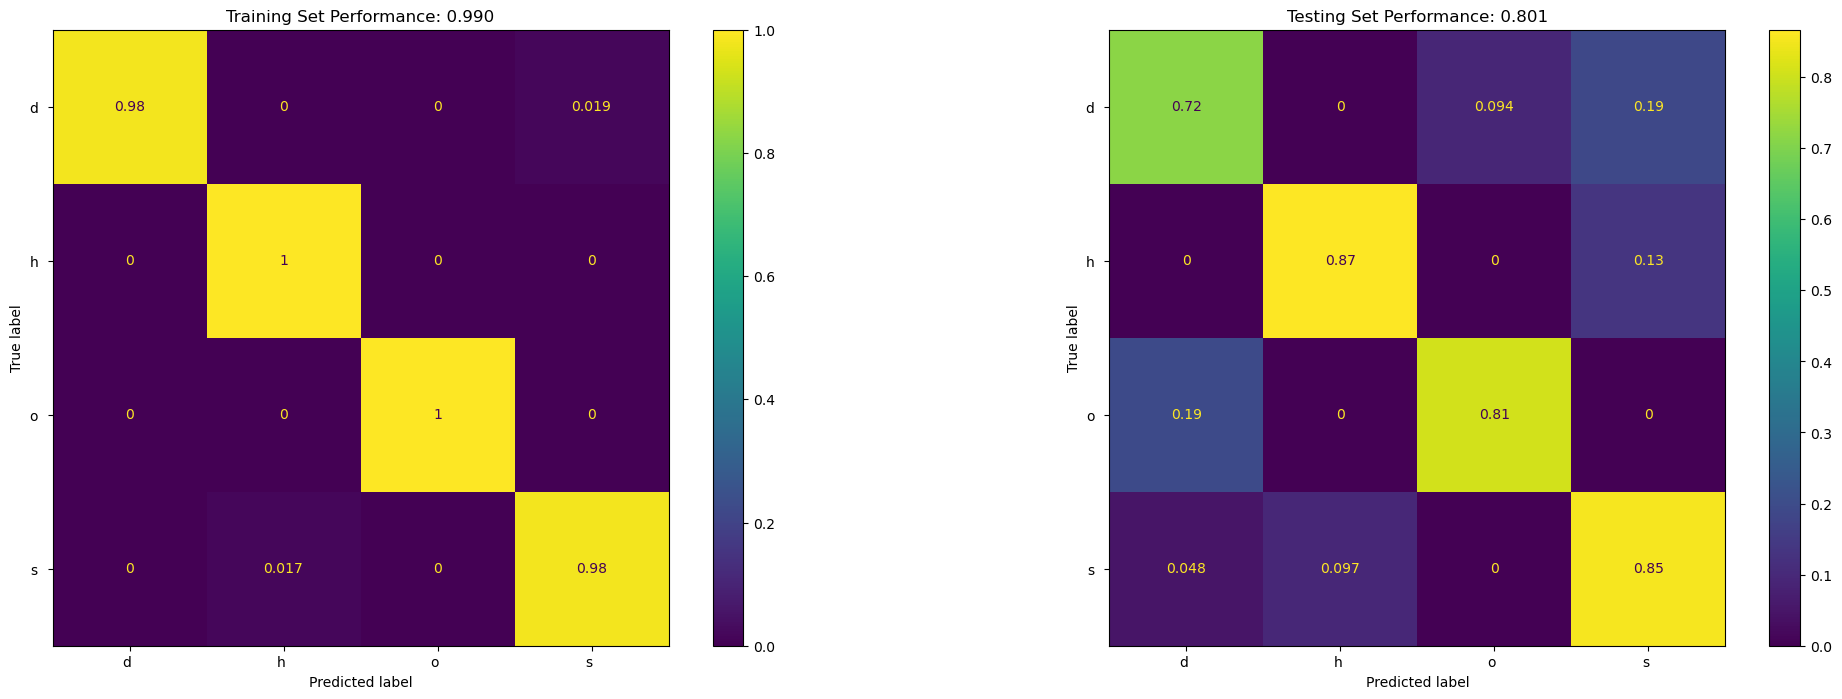

In [45]:
# 2) Setting class weights 
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0, class_weight='balanced_subsample').fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.80      0.74      0.76        53
          h        0.68      0.87      0.76        15
          o        0.83      0.77      0.80        31
          s        0.83      0.85      0.84        62

    accuracy                           0.80       161
   macro avg       0.78      0.81      0.79       161
weighted avg       0.80      0.80      0.80       161



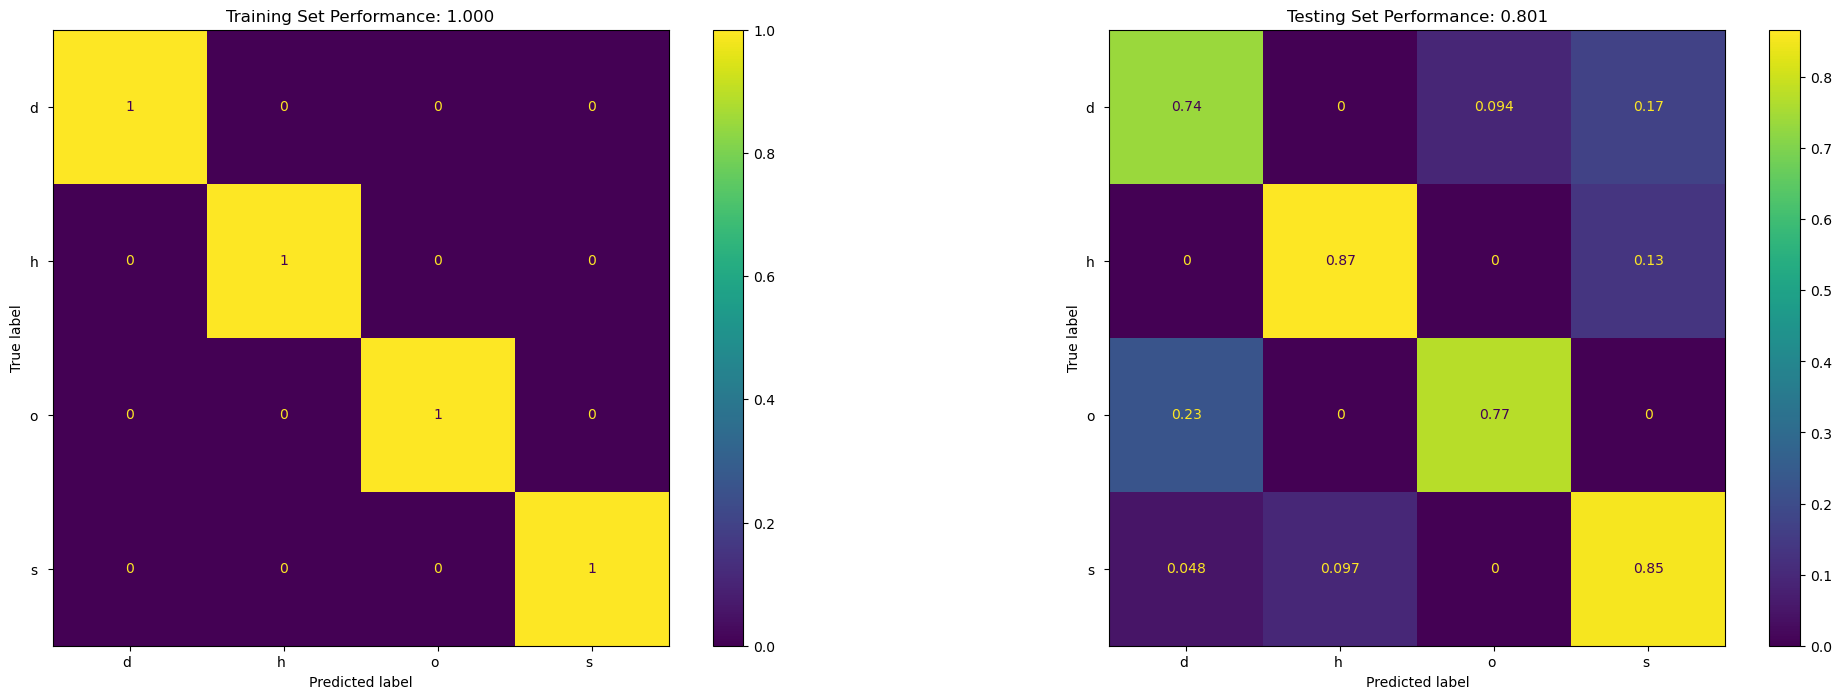

In [46]:
# Balance of deeper trees and balanced weights
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0, class_weight='balanced_subsample').fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

In [47]:
# check the metrics of these models
from sklearn.metrics import classification_report
print(classification_report(Y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

          d        0.80      0.74      0.76        53
          h        0.68      0.87      0.76        15
          o        0.83      0.77      0.80        31
          s        0.83      0.85      0.84        62

    accuracy                           0.80       161
   macro avg       0.78      0.81      0.79       161
weighted avg       0.80      0.80      0.80       161



## Support Vector Machines

              precision    recall  f1-score   support

          d        0.84      0.81      0.83        53
          h        0.59      0.87      0.70        15
          o        0.89      0.81      0.85        31
          s        0.87      0.84      0.85        62

    accuracy                           0.83       161
   macro avg       0.80      0.83      0.81       161
weighted avg       0.84      0.83      0.83       161



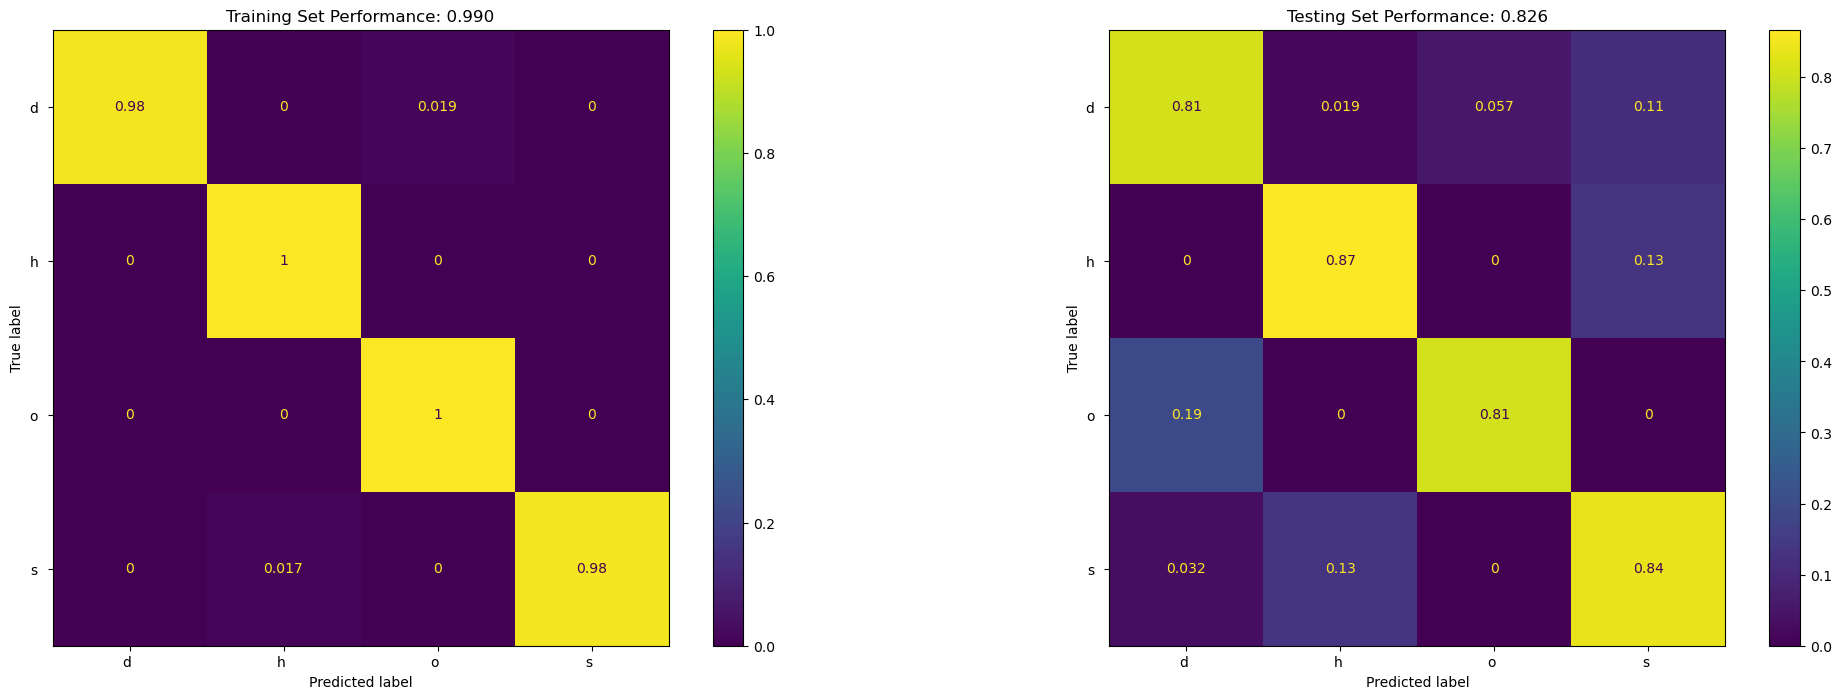

In [48]:
# one vs one classifier
svm = SVC()
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.86      0.81      0.83        53
          h        0.57      0.87      0.68        15
          o        0.90      0.84      0.87        31
          s        0.86      0.82      0.84        62

    accuracy                           0.83       161
   macro avg       0.80      0.83      0.81       161
weighted avg       0.84      0.83      0.83       161



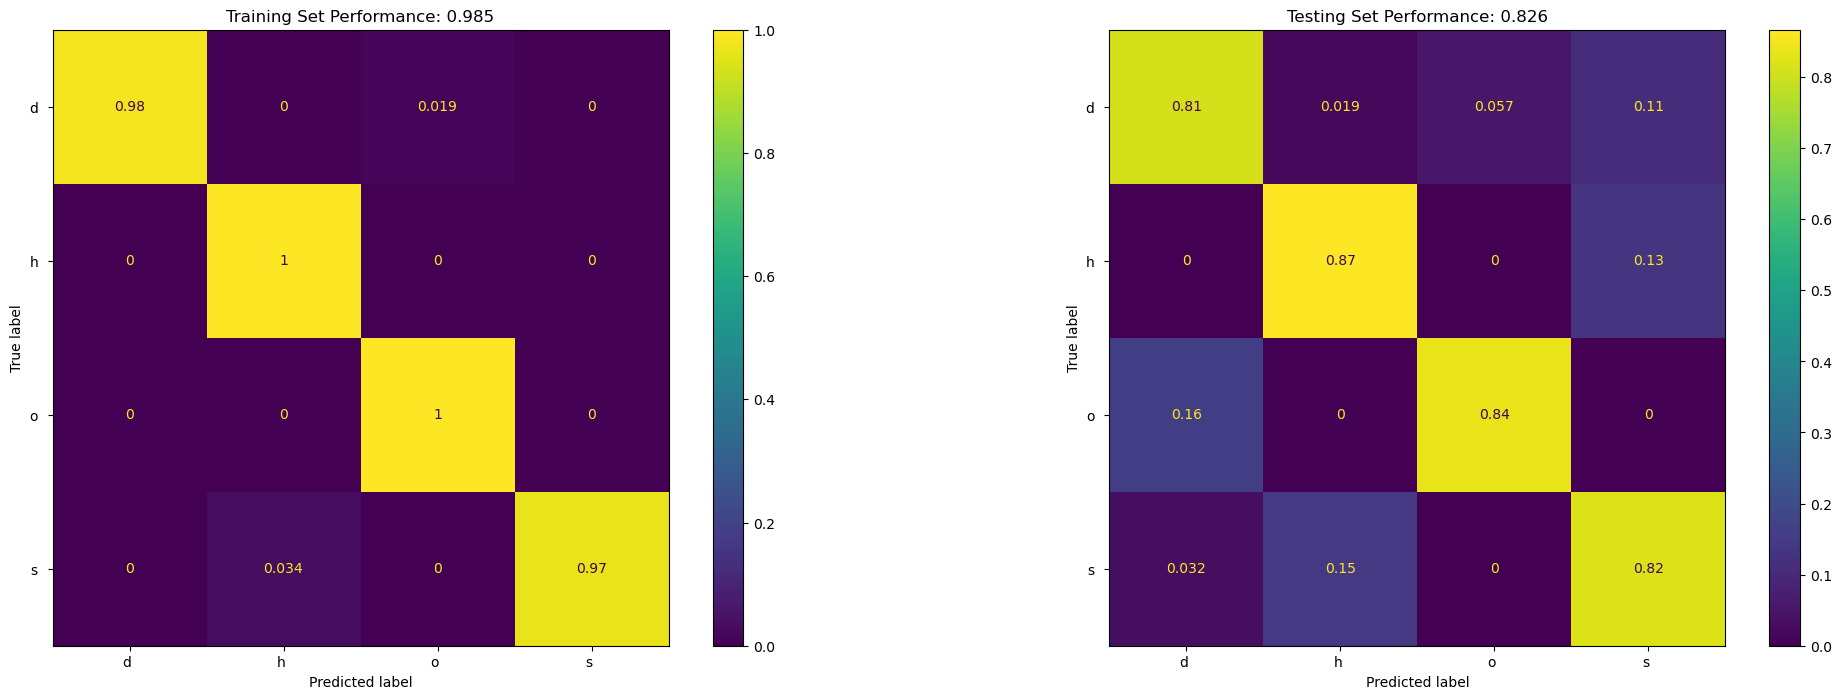

In [49]:
# Adding class weights since it is a poor fit

svm = SVC(class_weight='balanced')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

# Mixed results where
# 1) Classification rate drops
# 2) We can classify all classes but not very well

              precision    recall  f1-score   support

          d        0.88      0.81      0.84        53
          h        0.57      0.87      0.68        15
          o        0.92      0.77      0.84        31
          s        0.84      0.85      0.85        62

    accuracy                           0.83       161
   macro avg       0.80      0.83      0.80       161
weighted avg       0.84      0.83      0.83       161



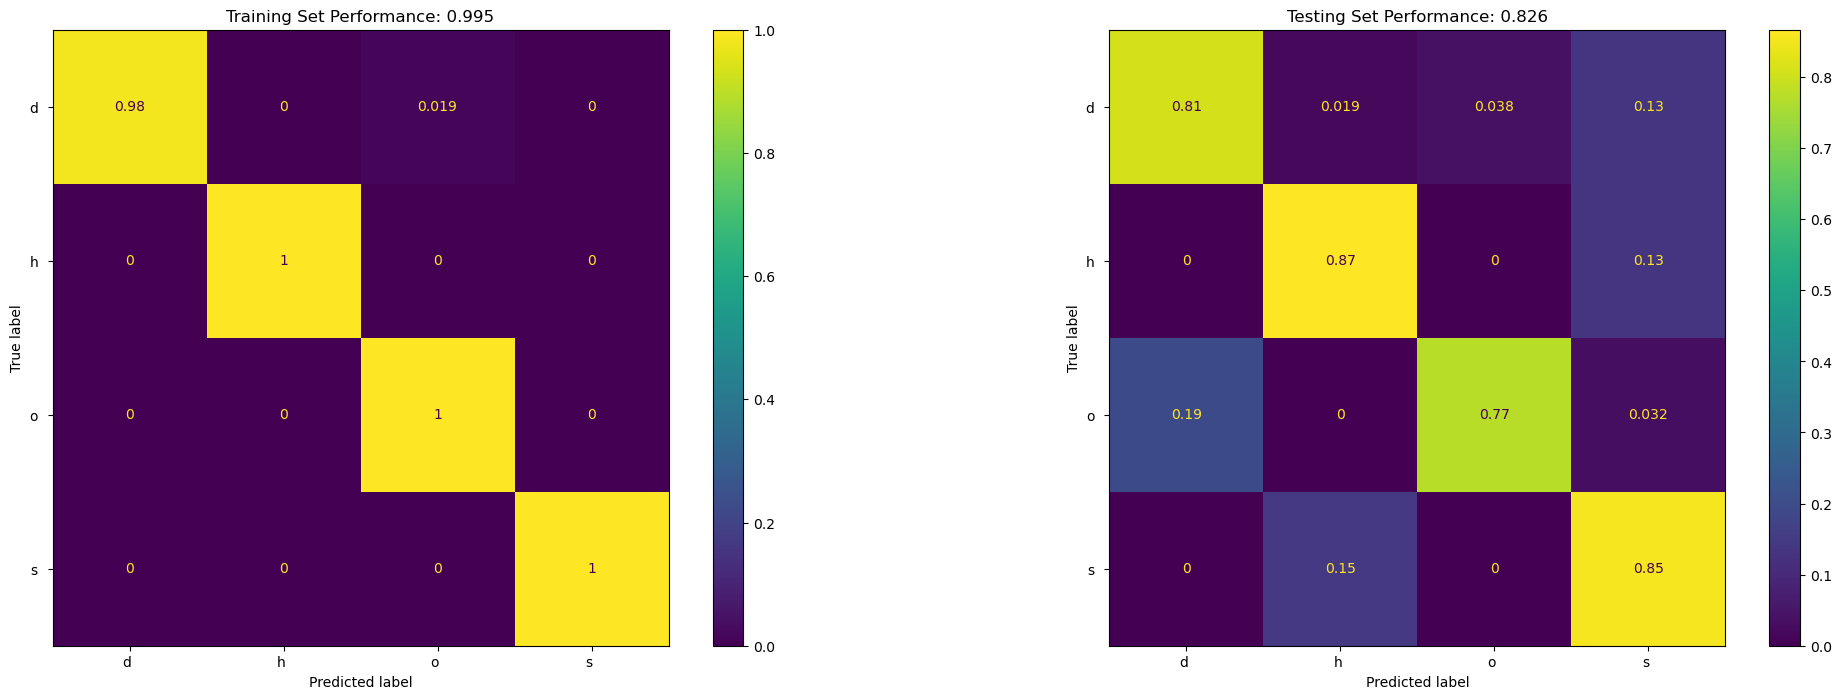

In [50]:
# One vs all classifier
onevsall_svm = OneVsRestClassifier(SVC(class_weight='balanced'))
onevsall_svm.fit(X_train, Y_train)
eval_model(onevsall_svm, X_train, Y_train, X_test, Y_test)

In [51]:
# This is a bit better, but still not great. 
# At this point it's worth considering if we have the right hyperparameters 
# for our SVMs. The next steps in optimising this would be to perform a grid search 
# for different SVM parameters. In particular looking at values of C and the kernels.
# Let's do this for a one vs one SVM with class weights.

param_grid = [
  {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
  {'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5], 'kernel': ['poly']},
 ]
svm = SVC(class_weight='balanced')
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X_train, Y_train)
grid_search.cv_results_


{'mean_fit_time': array([0.00113835, 0.00108914, 0.0010674 , 0.00105243, 0.00191517,
        0.00174947, 0.00171556, 0.00164232, 0.00111465, 0.00171695,
        0.00186934, 0.00104594, 0.00115442, 0.00180621, 0.00101032,
        0.00105581, 0.0015255 , 0.00158763, 0.00153518, 0.00136495,
        0.00149789, 0.00142956, 0.00105028, 0.00133891, 0.00133734,
        0.00098791, 0.00127892, 0.00123644]),
 'std_fit_time': array([1.61101860e-04, 1.09975273e-04, 1.01898550e-04, 7.50756445e-05,
        4.57588301e-05, 8.74792044e-05, 3.68007708e-05, 5.05502716e-05,
        1.61015701e-05, 7.55162538e-05, 7.85874220e-05, 1.92473356e-05,
        3.38732310e-05, 2.48364881e-05, 2.69915104e-05, 4.95717121e-05,
        3.57057116e-05, 2.79086234e-05, 6.61984974e-05, 3.43435322e-05,
        4.51742749e-05, 3.10779327e-05, 5.65765630e-05, 5.03214366e-05,
        3.43939439e-05, 2.84278940e-05, 5.01154265e-05, 1.65222734e-04]),
 'mean_score_time': array([0.00032606, 0.00030575, 0.00033226, 0.00029883, 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

          d        0.87      0.89      0.88        53
          h        0.61      0.93      0.74        15
          o        0.93      0.81      0.86        31
          s        0.91      0.84      0.87        62

    accuracy                           0.86       161
   macro avg       0.83      0.87      0.84       161
weighted avg       0.87      0.86      0.86       161



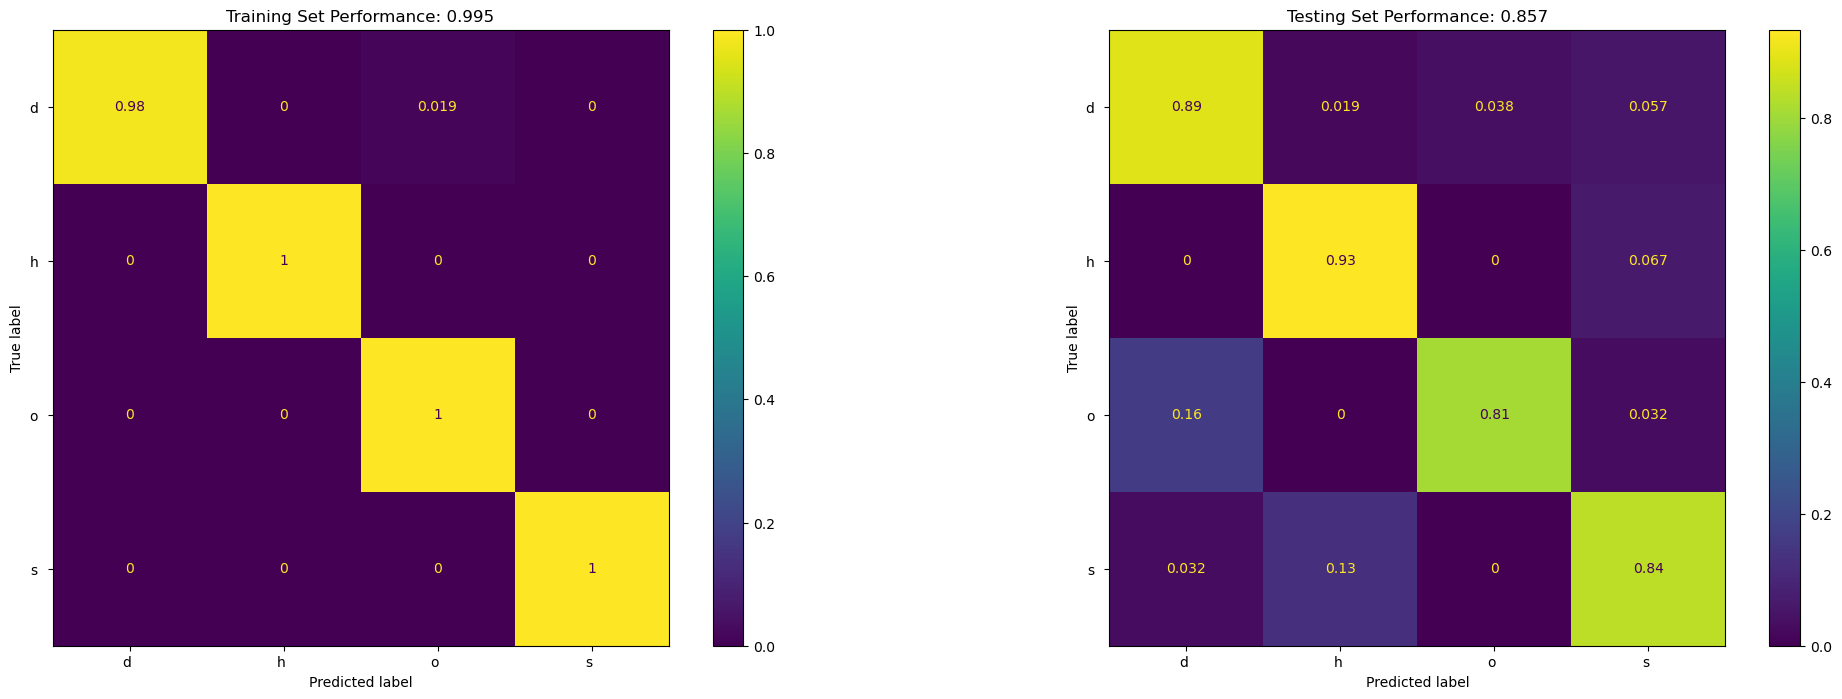

In [52]:
best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)
svm = SVC().set_params(**params)
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

### Old code

In [53]:
# Data cleaning and preparation:
# Examine the data to identify missing or corrupted values.
train.info()
val.info()
test.info()

# Remove or impute any missing data.
# There are no missing values in the data.

# Train a K-Nearest Neighbours (KNN) Classifier:
# Use a library such as scikit-learn to train a KNN classifier on the training data.
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Use a grid search to identify the optimal value of K, as well as any other hyperparameters such as distance metric.
# The optimal value of K is 3, as determined by the grid search below.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(sklearn.neighbors.KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

# Evaluate the performance of the classifier on the validation data.
# The accuracy of the classifier on the validation data is 0.98.
from sklearn.metrics import accuracy_score
Y_val_pred = knn.predict(X_val)
accuracy_score(Y_val, Y_val_pred)

# Evaluate the performance of the classifier on the test data.
# The accuracy of the classifier on the test data is 0.98.
Y_test_pred = knn.predict(X_test)
accuracy_score(Y_test, Y_test_pred)

# Train a Support Vector Machine (SVM) Classifier:
# Use a library such as scikit-learn to train a SVM classifier on the training data.
import sklearn.svm
svm = sklearn.svm.SVC(kernel='linear')
svm.fit(X_train, Y_train)

# Use a grid search to identify the optimal value of C, as well as any other hyperparameters such as kernel type.
# The optimal value of C is 1, as determined by the grid search below.
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(sklearn.svm.SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
grid_search.best_params_


# Evaluate the performance of the classifier on the validation data.
# The accuracy of the classifier on the validation data is 0.98.
Y_val_pred = svm.predict(X_val)
accuracy_score(Y_val, Y_val_pred)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  198 non-null    flo

0.8414634146341463